# importando pacotes

In [1]:
library(ggplot2)
library(dplyr)
library(readr)
library(lubridate)

library(scales)


Anexando pacote: ‘dplyr’


Os seguintes objetos são mascarados por ‘package:stats’:

    filter, lag


Os seguintes objetos são mascarados por ‘package:base’:

    intersect, setdiff, setequal, union



Anexando pacote: ‘lubridate’


Os seguintes objetos são mascarados por ‘package:base’:

    date, intersect, setdiff, union



Anexando pacote: ‘scales’


O seguinte objeto é mascarado por ‘package:readr’:

    col_factor




In [2]:
options(repr.plot.width = 15, repr.plot.height = 10)

# importando dados

In [3]:
clientes <- read_csv("dados/zoop_clientes.csv")
vendas <- read_csv("dados/zoop_vendas.csv")

Rows: 6169 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): cidade, uf, regiao, sexo_biologico, cashback
dbl (4): ID_compra, ID_cliente, idade, avaliacao_compra

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 6169 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): categoria, metodo_pagamento
dbl  (4): ID_compra, preco_unitario, quantidade, frete
date (1): data
time (1): horario

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
head(clientes)

ID_compra,ID_cliente,cidade,uf,regiao,idade,sexo_biologico,cashback,avaliacao_compra
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
904,8972,Natal,Rio Grande do Norte,Nordeste,49,Masculino,Não,9
4613,5120,São Paulo,São Paulo,Sudeste,49,Feminino,Não,9
5579,1847,São Paulo,São Paulo,Sudeste,24,Feminino,Não,8
2405,2846,São Paulo,São Paulo,Sudeste,38,Feminino,Sim,7
2485,2715,Salvador,Bahia,Nordeste,30,Feminino,Não,10
756,9555,João Pessoa,Paraíba,Nordeste,46,Feminino,Não,7


In [5]:
head(vendas)

ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento
<dbl>,<date>,<time>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
6,2023-01-03,20:40:00,Tecnologia,899.19,4,713.26,Boleto
5,2023-01-03,21:48:00,Casa/Móveis,115.90,1,0.00,PIX
9,2023-01-03,17:08:00,Beleza/Saúde,68.90,2,13.78,Crédito
4,2023-01-03,14:29:00,Casa/Móveis,80.90,5,40.45,PIX
8,2023-01-03,18:02:00,Beleza/Saúde,165.00,4,0.00,PIX
2,2023-01-03,18:42:00,Tecnologia,2028.48,5,1724.37,PIX


In [6]:
glimpse(clientes)

Rows: 6,169
Columns: 9
$ ID_compra        <dbl> 904, 4613, 5579, 2405, 2485, 756, 3020, 2390, 3957, 5…
$ ID_cliente       <dbl> 8972, 5120, 1847, 2846, 2715, 9555, 3793, 4903, 3413,…
$ cidade           <chr> "Natal", "São Paulo", "São Paulo", "São Paulo", "Salv…
$ uf               <chr> "Rio Grande do Norte", "São Paulo", "São Paulo", "São…
$ regiao           <chr> "Nordeste", "Sudeste", "Sudeste", "Sudeste", "Nordest…
$ idade            <dbl> 49, 49, 24, 38, 30, 46, 32, 26, 30, 28, 25, 31, 40, 4…
$ sexo_biologico   <chr> "Masculino", "Feminino", "Feminino", "Feminino", "Fem…
$ cashback         <chr> "Não", "Não", "Não", "Sim", "Não", "Não", "Sim", "Não…
$ avaliacao_compra <dbl> 9, 9, 8, 7, 10, 7, 9, 9, 10, 8, 7, 10, 9, 8, 8, 7, 10…


In [7]:
glimpse(vendas)

Rows: 6,169
Columns: 8
$ ID_compra        <dbl> 6, 5, 9, 4, 8, 2, 3, 1, 7, 11, 19, 13, 12, 14, 17, 16…
$ data             <date> 2023-01-03, 2023-01-03, 2023-01-03, 2023-01-03, 2023…
$ horario          <time> 20:40:00, 21:48:00, 17:08:00, 14:29:00, 18:02:00, 18…
$ categoria        <chr> "Tecnologia", "Casa/Móveis", "Beleza/Saúde", "Casa/Mó…
$ preco_unitario   <dbl> 899.19, 115.90, 68.90, 80.90, 165.00, 2028.48, 84.90,…
$ quantidade       <dbl> 4, 1, 2, 5, 4, 5, 5, 1, 5, 5, 4, 3, 3, 3, 3, 2, 5, 4,…
$ frete            <dbl> 713.26, 0.00, 13.78, 40.45, 0.00, 1724.37, 0.00, 138.…
$ metodo_pagamento <chr> "Boleto", "PIX", "Crédito", "PIX", "PIX", "PIX", "Cré…


# tratando dados

## tabela vendas

In [8]:
head(vendas)

ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento
<dbl>,<date>,<time>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
6,2023-01-03,20:40:00,Tecnologia,899.19,4,713.26,Boleto
5,2023-01-03,21:48:00,Casa/Móveis,115.90,1,0.00,PIX
9,2023-01-03,17:08:00,Beleza/Saúde,68.90,2,13.78,Crédito
4,2023-01-03,14:29:00,Casa/Móveis,80.90,5,40.45,PIX
8,2023-01-03,18:02:00,Beleza/Saúde,165.00,4,0.00,PIX
2,2023-01-03,18:42:00,Tecnologia,2028.48,5,1724.37,PIX


In [9]:
vendas <- vendas %>% 
            mutate_if(is.character, as.factor)

head(vendas)

ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento
<dbl>,<date>,<time>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
6,2023-01-03,20:40:00,Tecnologia,899.19,4,713.26,Boleto
5,2023-01-03,21:48:00,Casa/Móveis,115.90,1,0.00,PIX
9,2023-01-03,17:08:00,Beleza/Saúde,68.90,2,13.78,Crédito
4,2023-01-03,14:29:00,Casa/Móveis,80.90,5,40.45,PIX
8,2023-01-03,18:02:00,Beleza/Saúde,165.00,4,0.00,PIX
2,2023-01-03,18:42:00,Tecnologia,2028.48,5,1724.37,PIX


In [10]:
vendas$valor_total <- vendas$preco_unitario * vendas$quantidade + vendas$frete

head(vendas)

ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,valor_total
<dbl>,<date>,<time>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
6,2023-01-03,20:40:00,Tecnologia,899.19,4,713.26,Boleto,4310.02
5,2023-01-03,21:48:00,Casa/Móveis,115.90,1,0.00,PIX,115.90
9,2023-01-03,17:08:00,Beleza/Saúde,68.90,2,13.78,Crédito,151.58
4,2023-01-03,14:29:00,Casa/Móveis,80.90,5,40.45,PIX,444.95
8,2023-01-03,18:02:00,Beleza/Saúde,165.00,4,0.00,PIX,660.00
2,2023-01-03,18:42:00,Tecnologia,2028.48,5,1724.37,PIX,11866.77


## tabela clientes

In [11]:
head(clientes)

ID_compra,ID_cliente,cidade,uf,regiao,idade,sexo_biologico,cashback,avaliacao_compra
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
904,8972,Natal,Rio Grande do Norte,Nordeste,49,Masculino,Não,9
4613,5120,São Paulo,São Paulo,Sudeste,49,Feminino,Não,9
5579,1847,São Paulo,São Paulo,Sudeste,24,Feminino,Não,8
2405,2846,São Paulo,São Paulo,Sudeste,38,Feminino,Sim,7
2485,2715,Salvador,Bahia,Nordeste,30,Feminino,Não,10
756,9555,João Pessoa,Paraíba,Nordeste,46,Feminino,Não,7


In [12]:
clientes <- clientes %>% 
            mutate_if(is.character, as.factor)

head(clientes)

ID_compra,ID_cliente,cidade,uf,regiao,idade,sexo_biologico,cashback,avaliacao_compra
<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>
904,8972,Natal,Rio Grande do Norte,Nordeste,49,Masculino,Não,9
4613,5120,São Paulo,São Paulo,Sudeste,49,Feminino,Não,9
5579,1847,São Paulo,São Paulo,Sudeste,24,Feminino,Não,8
2405,2846,São Paulo,São Paulo,Sudeste,38,Feminino,Sim,7
2485,2715,Salvador,Bahia,Nordeste,30,Feminino,Não,10
756,9555,João Pessoa,Paraíba,Nordeste,46,Feminino,Não,7


# visualização de dados

## clientes

In [13]:
head(clientes %>% count(ID_cliente, sort = T))

ID_cliente,n
<dbl>,<int>
5267,7
4421,6
5145,6
9864,6
1442,5
6698,5


In [14]:
clientes_unicos <- clientes %>% distinct(ID_cliente,.keep_all = T)
head(clientes_unicos)

ID_compra,ID_cliente,cidade,uf,regiao,idade,sexo_biologico,cashback,avaliacao_compra
<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>
904,8972,Natal,Rio Grande do Norte,Nordeste,49,Masculino,Não,9
4613,5120,São Paulo,São Paulo,Sudeste,49,Feminino,Não,9
5579,1847,São Paulo,São Paulo,Sudeste,24,Feminino,Não,8
2405,2846,São Paulo,São Paulo,Sudeste,38,Feminino,Sim,7
2485,2715,Salvador,Bahia,Nordeste,30,Feminino,Não,10
756,9555,João Pessoa,Paraíba,Nordeste,46,Feminino,Não,7


### como está distribuido o publico por idade?

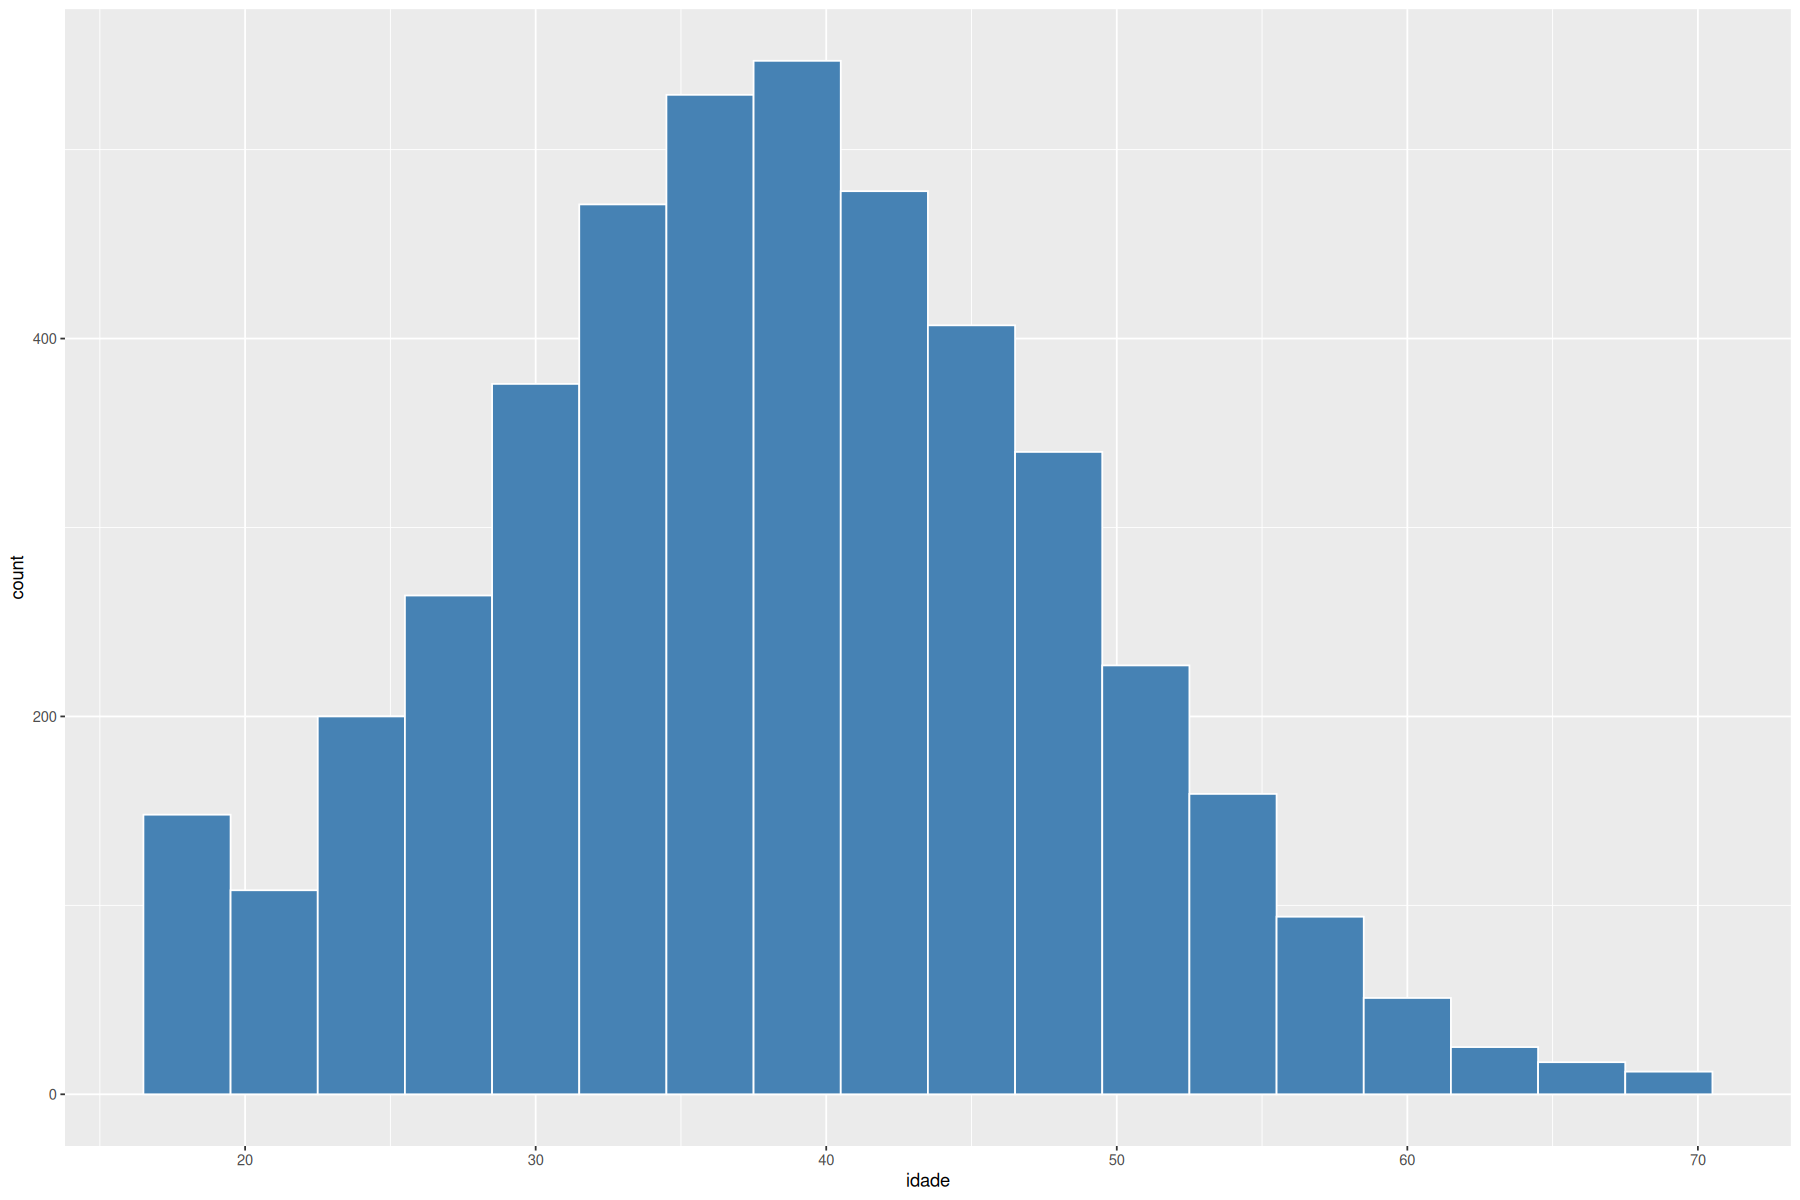

In [15]:
ggplot(clientes_unicos, aes(idade)) + 
    geom_histogram(binwidth = 3, fill = "steelblue", color = "white")

### como está distribuido o publico por idade e região?

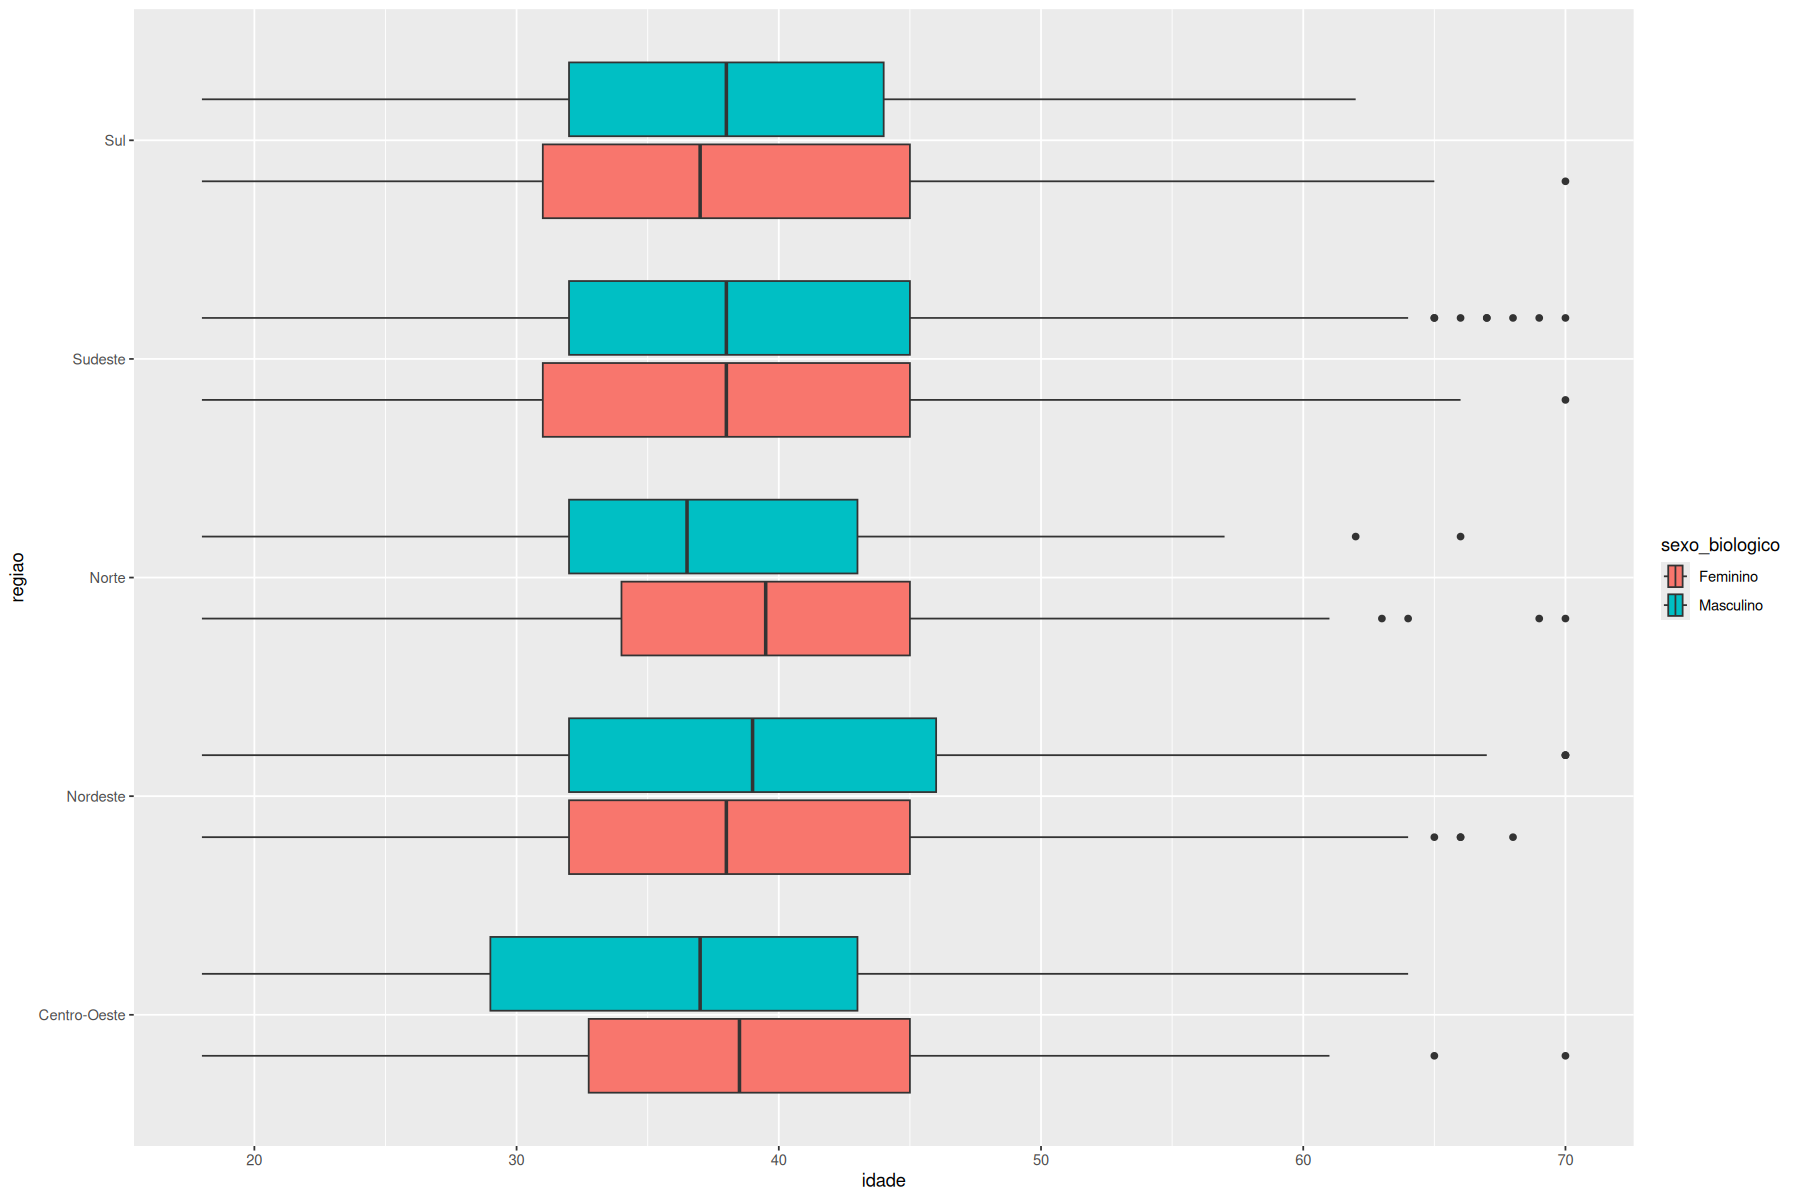

In [16]:
ggplot(clientes_unicos) +
    geom_boxplot(aes(x = idade, y = regiao, fill = sexo_biologico))

### dos clientes usam cashback, qual a proporção por região?

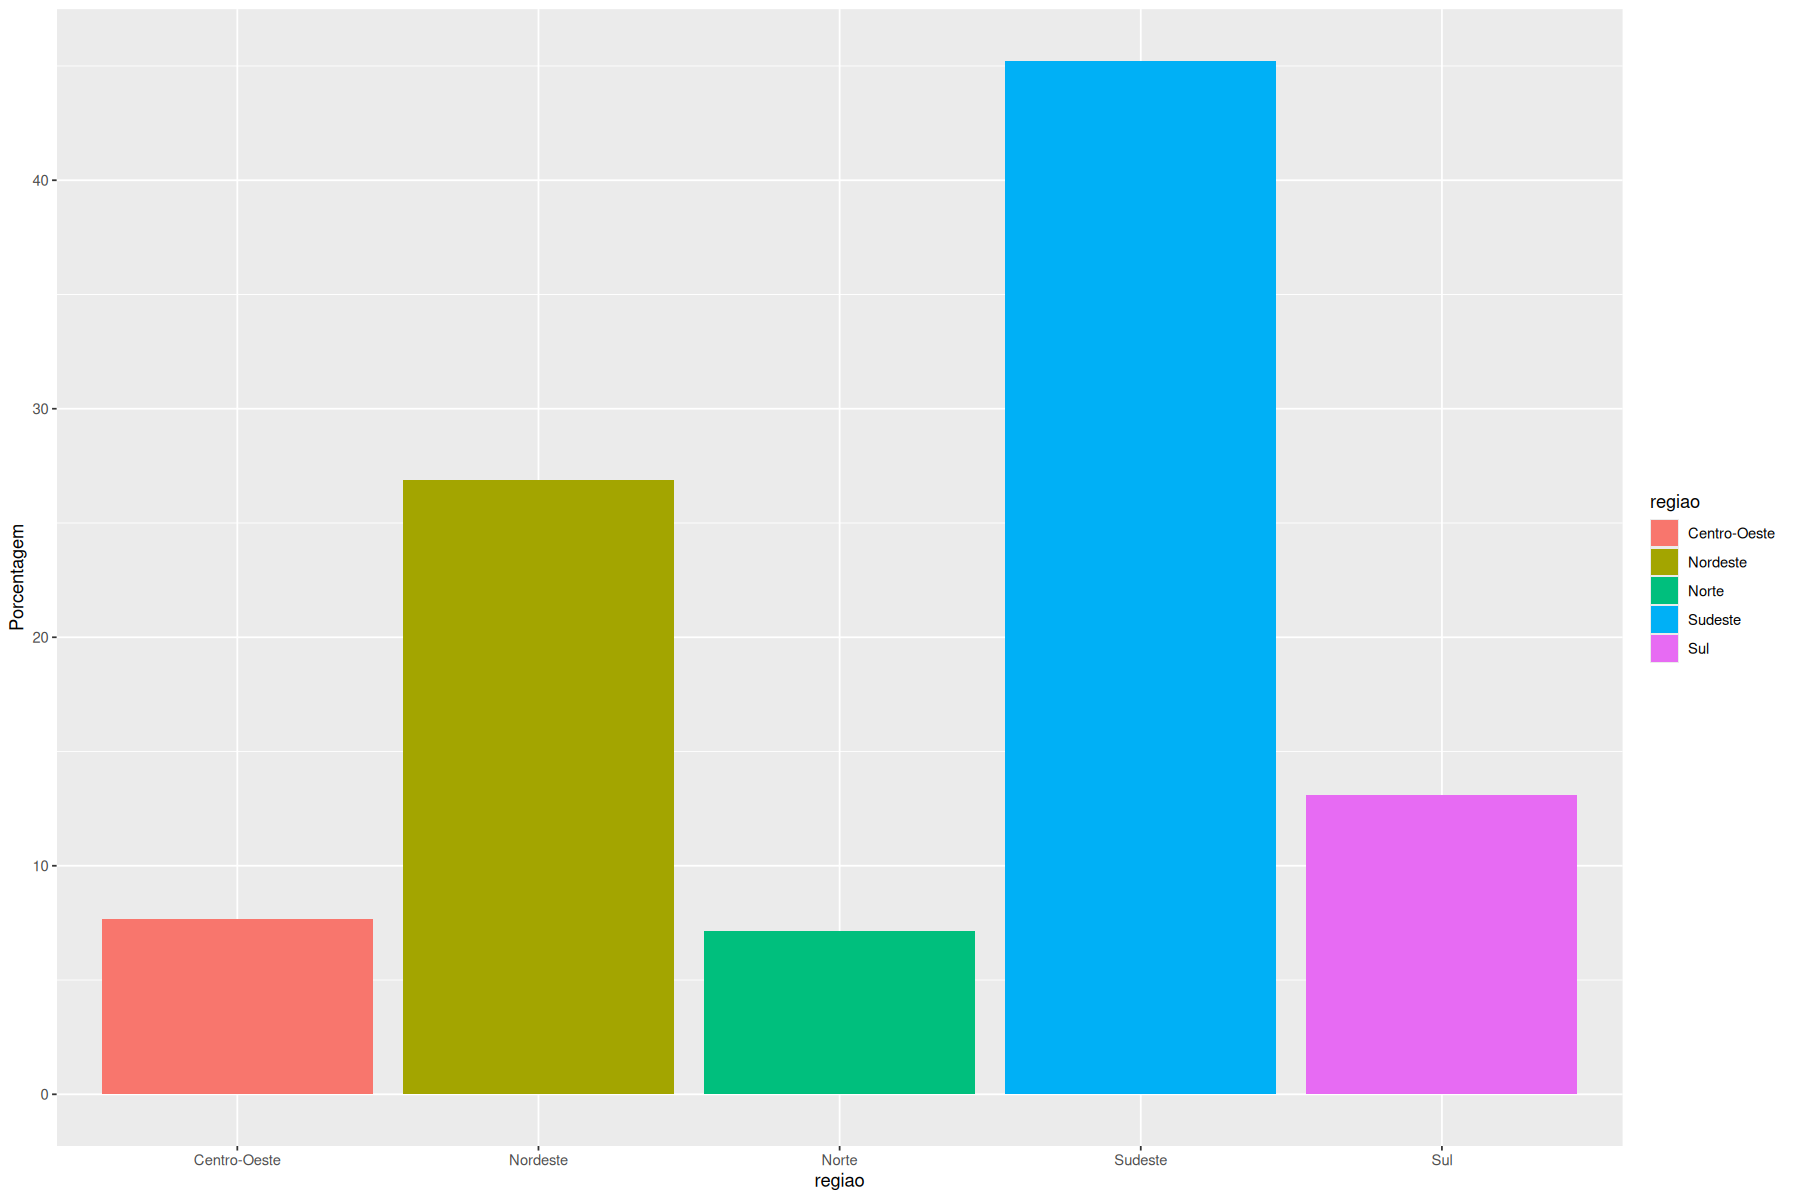

In [17]:
clientes_unicos %>% filter(cashback == "Sim") %>%
    ggplot(aes(x = regiao, fill = regiao)) +
    geom_bar(aes(y = after_stat(100 * count/sum(count)))) +
    labs(y = "Porcentagem")

## vendas

### qual o faturamento por categoria em 2023?

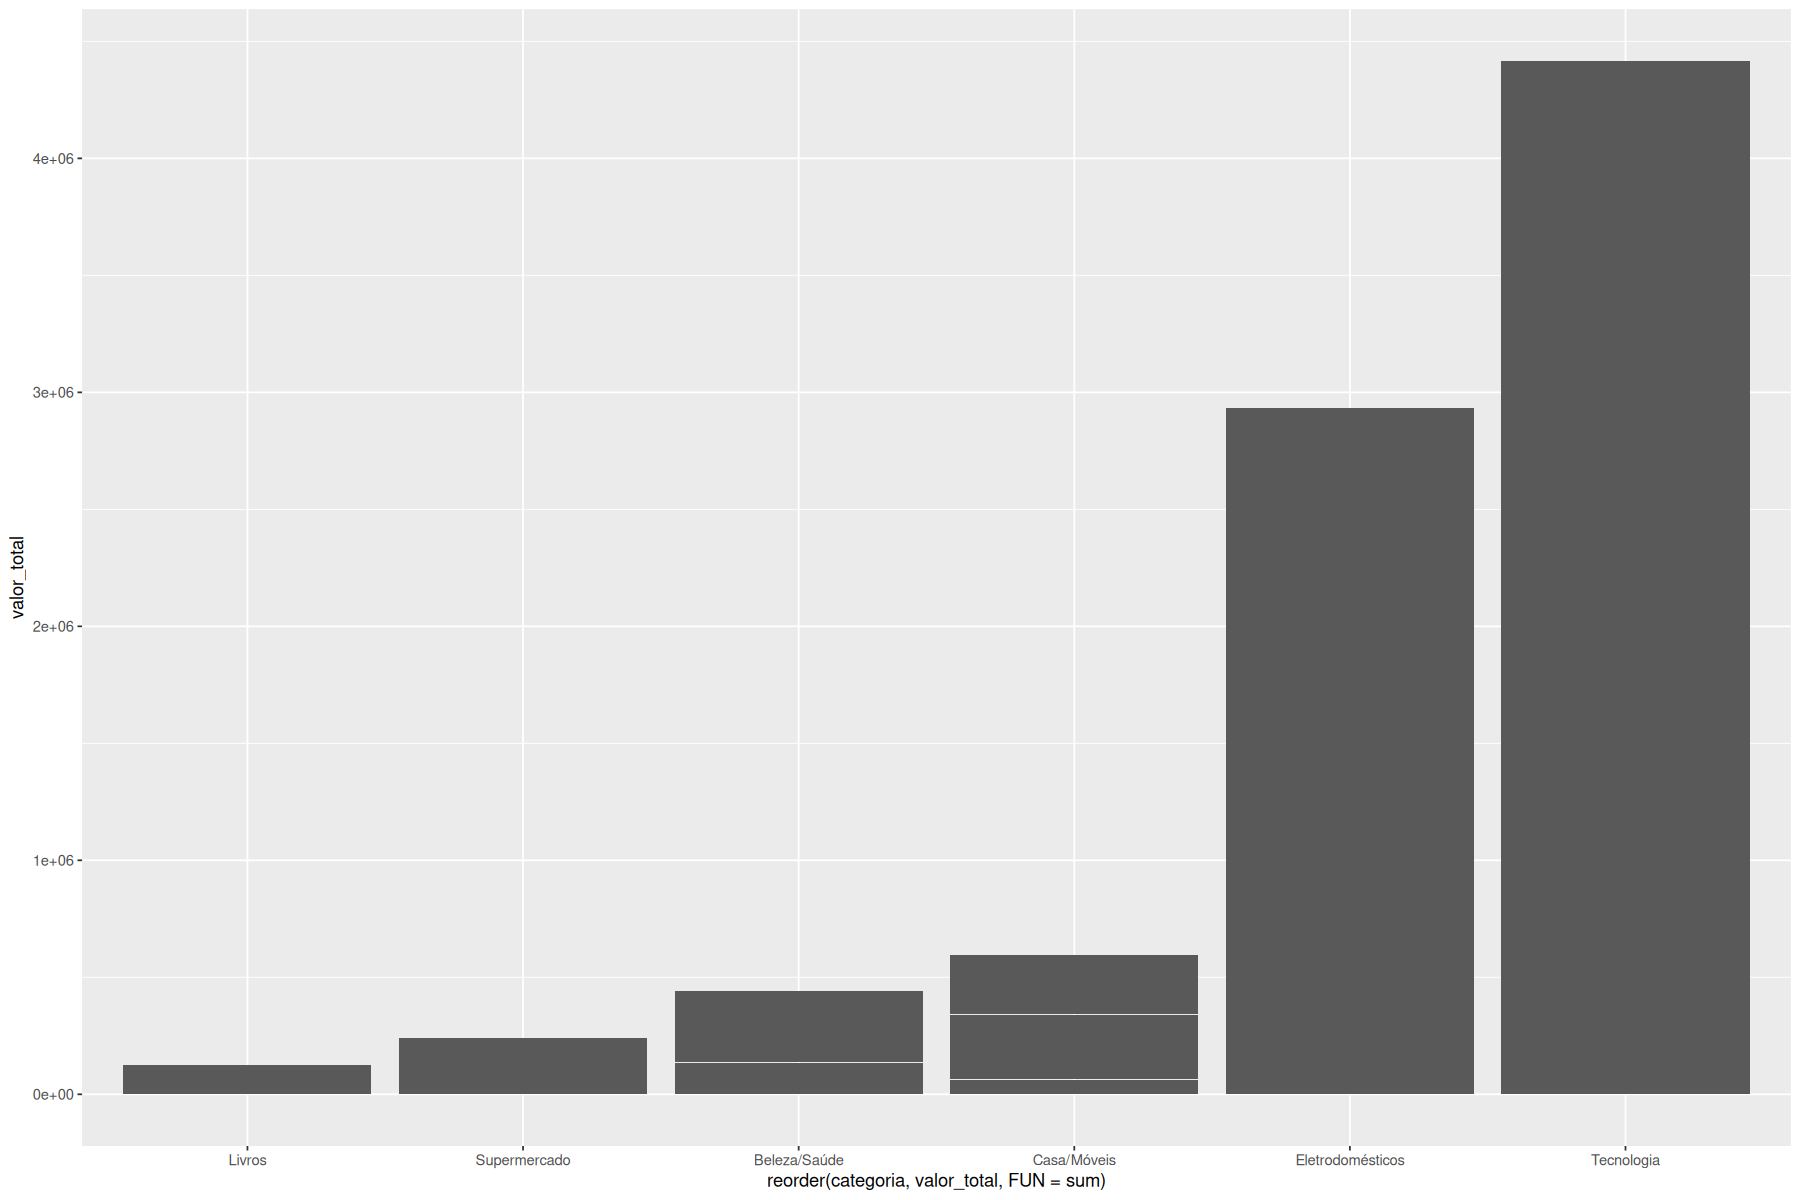

In [18]:
g <- ggplot(vendas, aes(x = reorder(categoria, valor_total, FUN = sum), y = valor_total)) +
    geom_col()

g

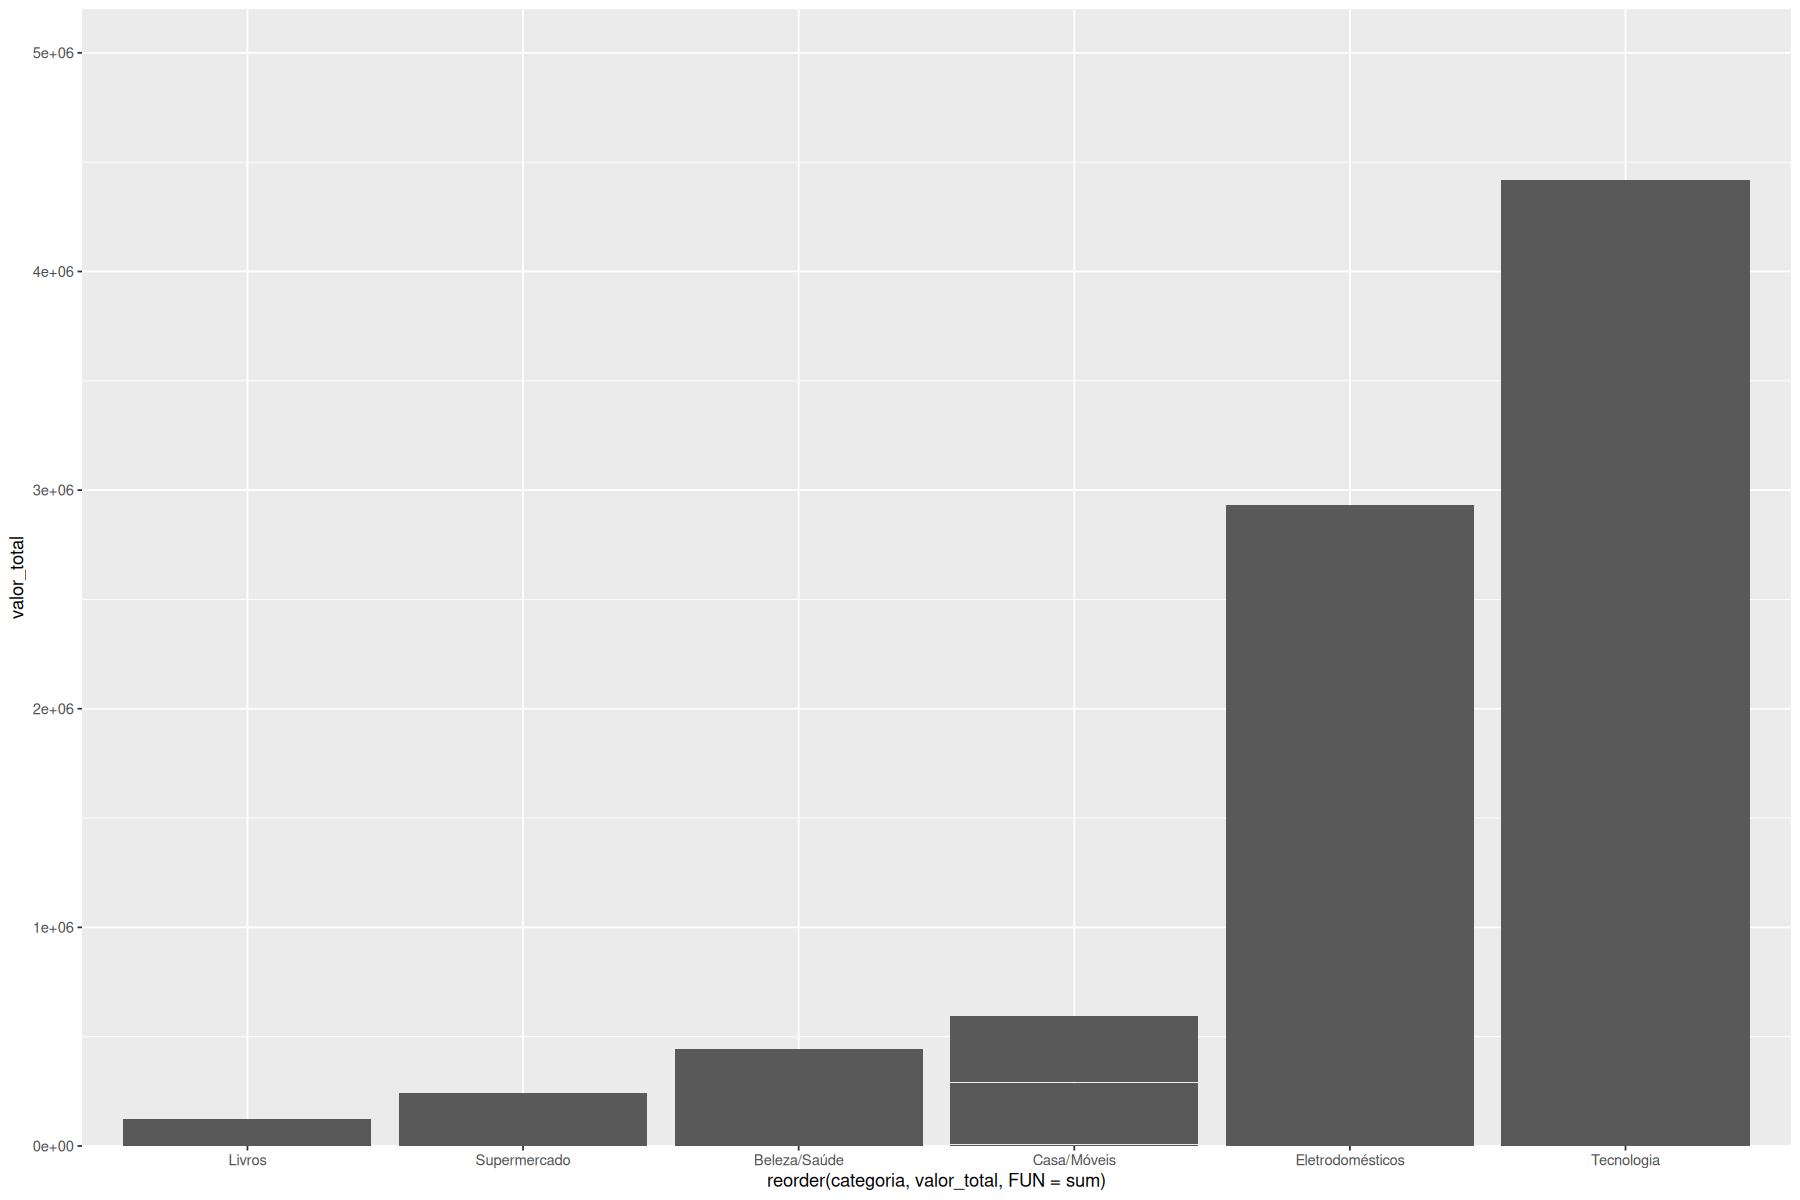

In [19]:
g <- g + scale_y_continuous(expand = c(0,0), limits = c(0, 5.2e6))
g

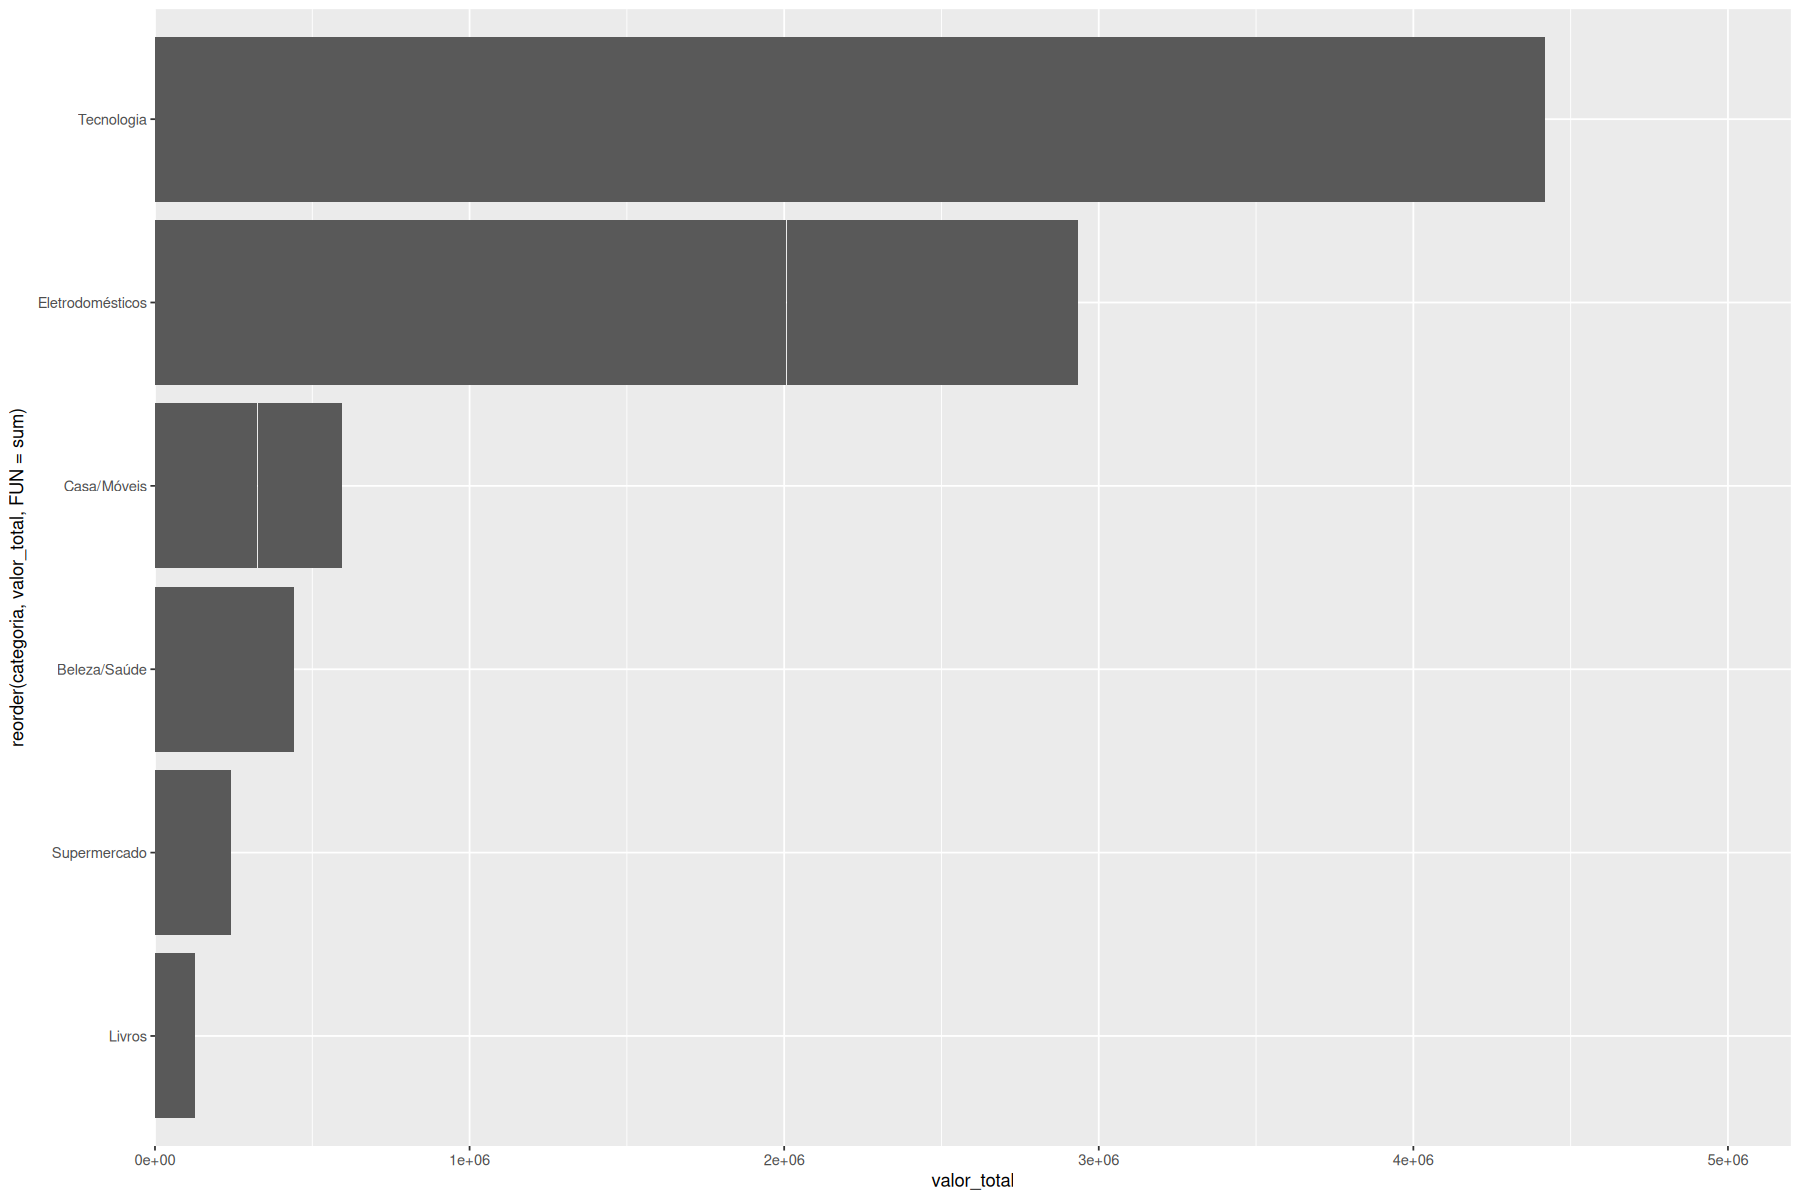

In [20]:
g <- g + coord_flip()
g

### qual foi o desempenho das vendas ao longo dos meses em 2023?

In [21]:
vendas <- vendas %>%
            mutate(mes = format(data, "%m"))
head(vendas)

ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,valor_total,mes
<dbl>,<date>,<time>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<chr>
6,2023-01-03,20:40:00,Tecnologia,899.19,4,713.26,Boleto,4310.02,01
5,2023-01-03,21:48:00,Casa/Móveis,115.90,1,0.00,PIX,115.90,01
9,2023-01-03,17:08:00,Beleza/Saúde,68.90,2,13.78,Crédito,151.58,01
4,2023-01-03,14:29:00,Casa/Móveis,80.90,5,40.45,PIX,444.95,01
8,2023-01-03,18:02:00,Beleza/Saúde,165.00,4,0.00,PIX,660.00,01
2,2023-01-03,18:42:00,Tecnologia,2028.48,5,1724.37,PIX,11866.77,01


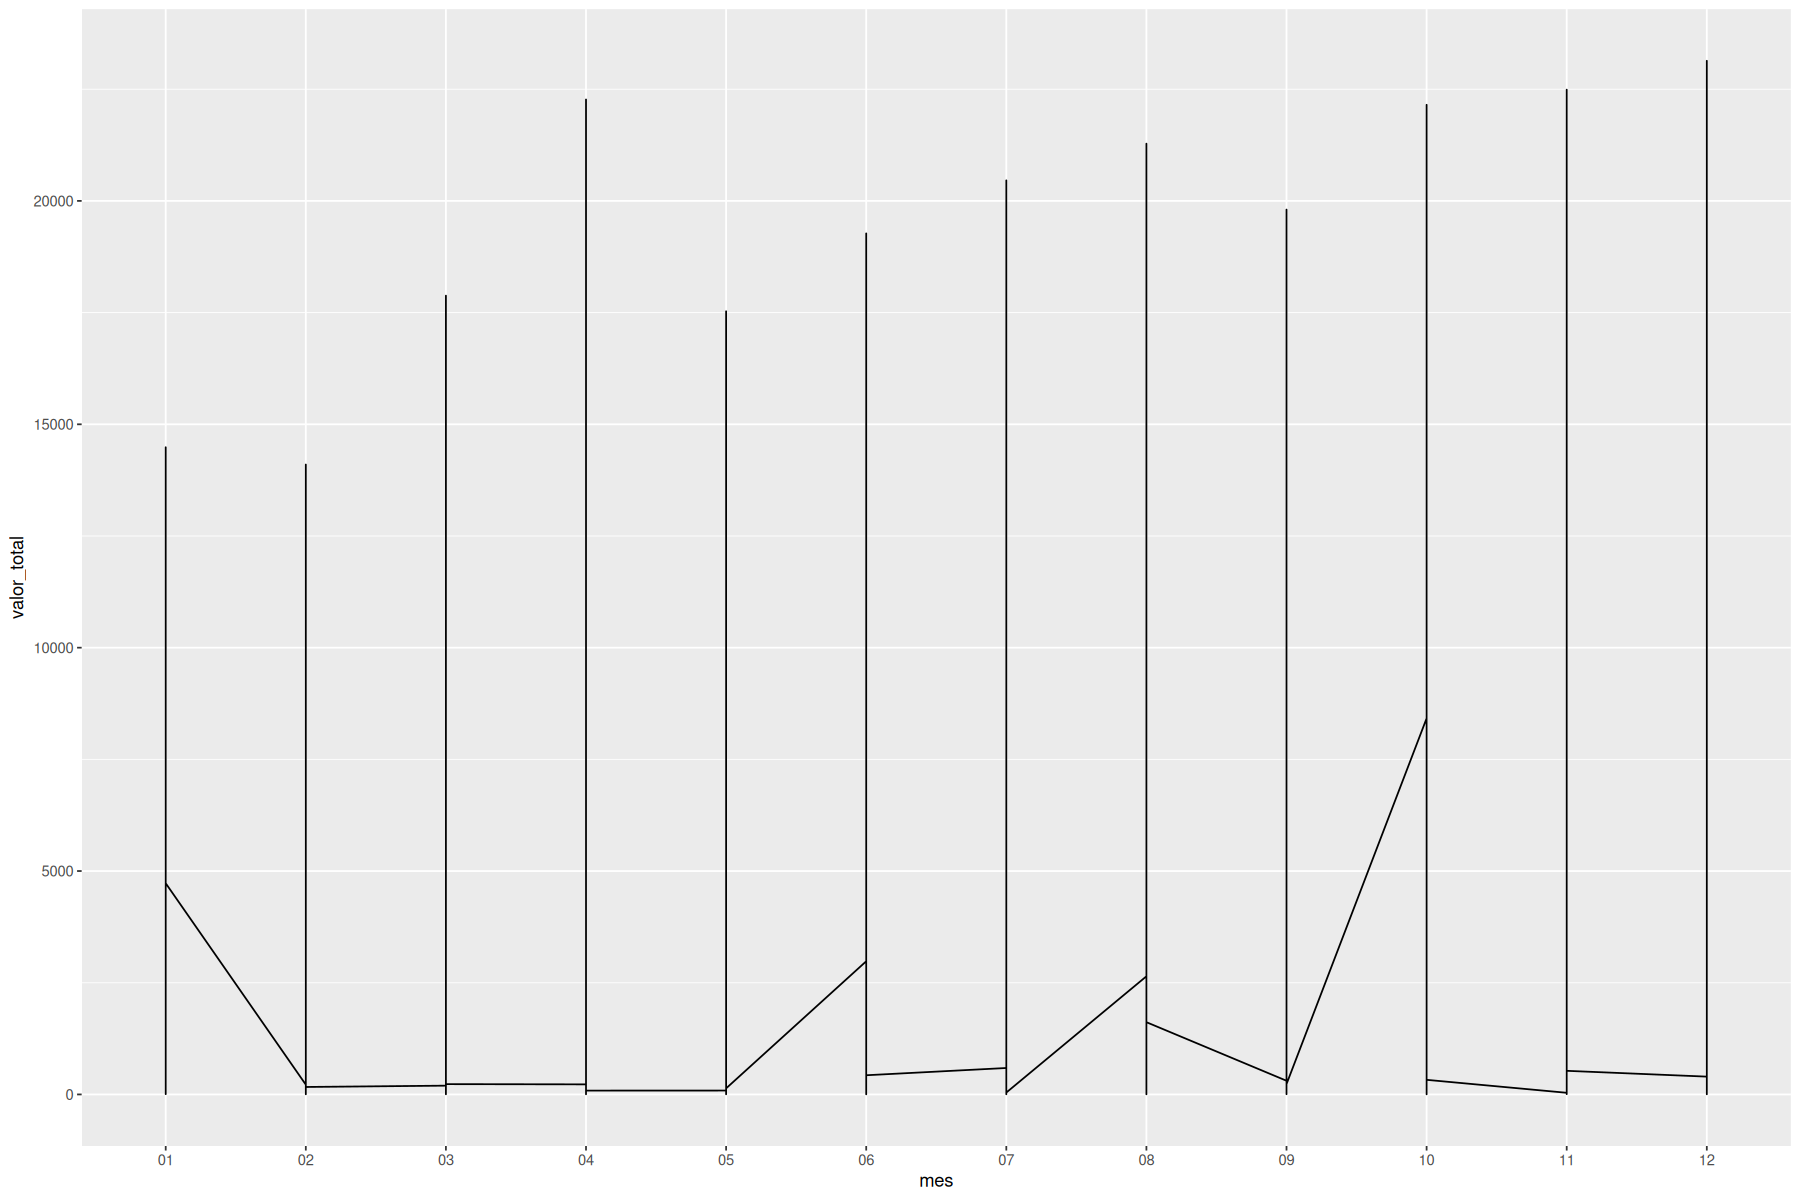

In [22]:
ggplot(vendas, aes(x = mes, y = valor_total)) +
    geom_line(aes(group = 1))

In [23]:
vendas_por_mes <- vendas %>% 
  group_by(mes) %>% 
  summarise(vendas_por_mes = sum(valor_total))

vendas_por_mes


mes,vendas_por_mes
<chr>,<dbl>
01,303680.9
02,231224.3
03,281818.2
04,286374.0
05,841253.6
06,781480.5
07,427311.2
08,1006684.6
09,419897.6


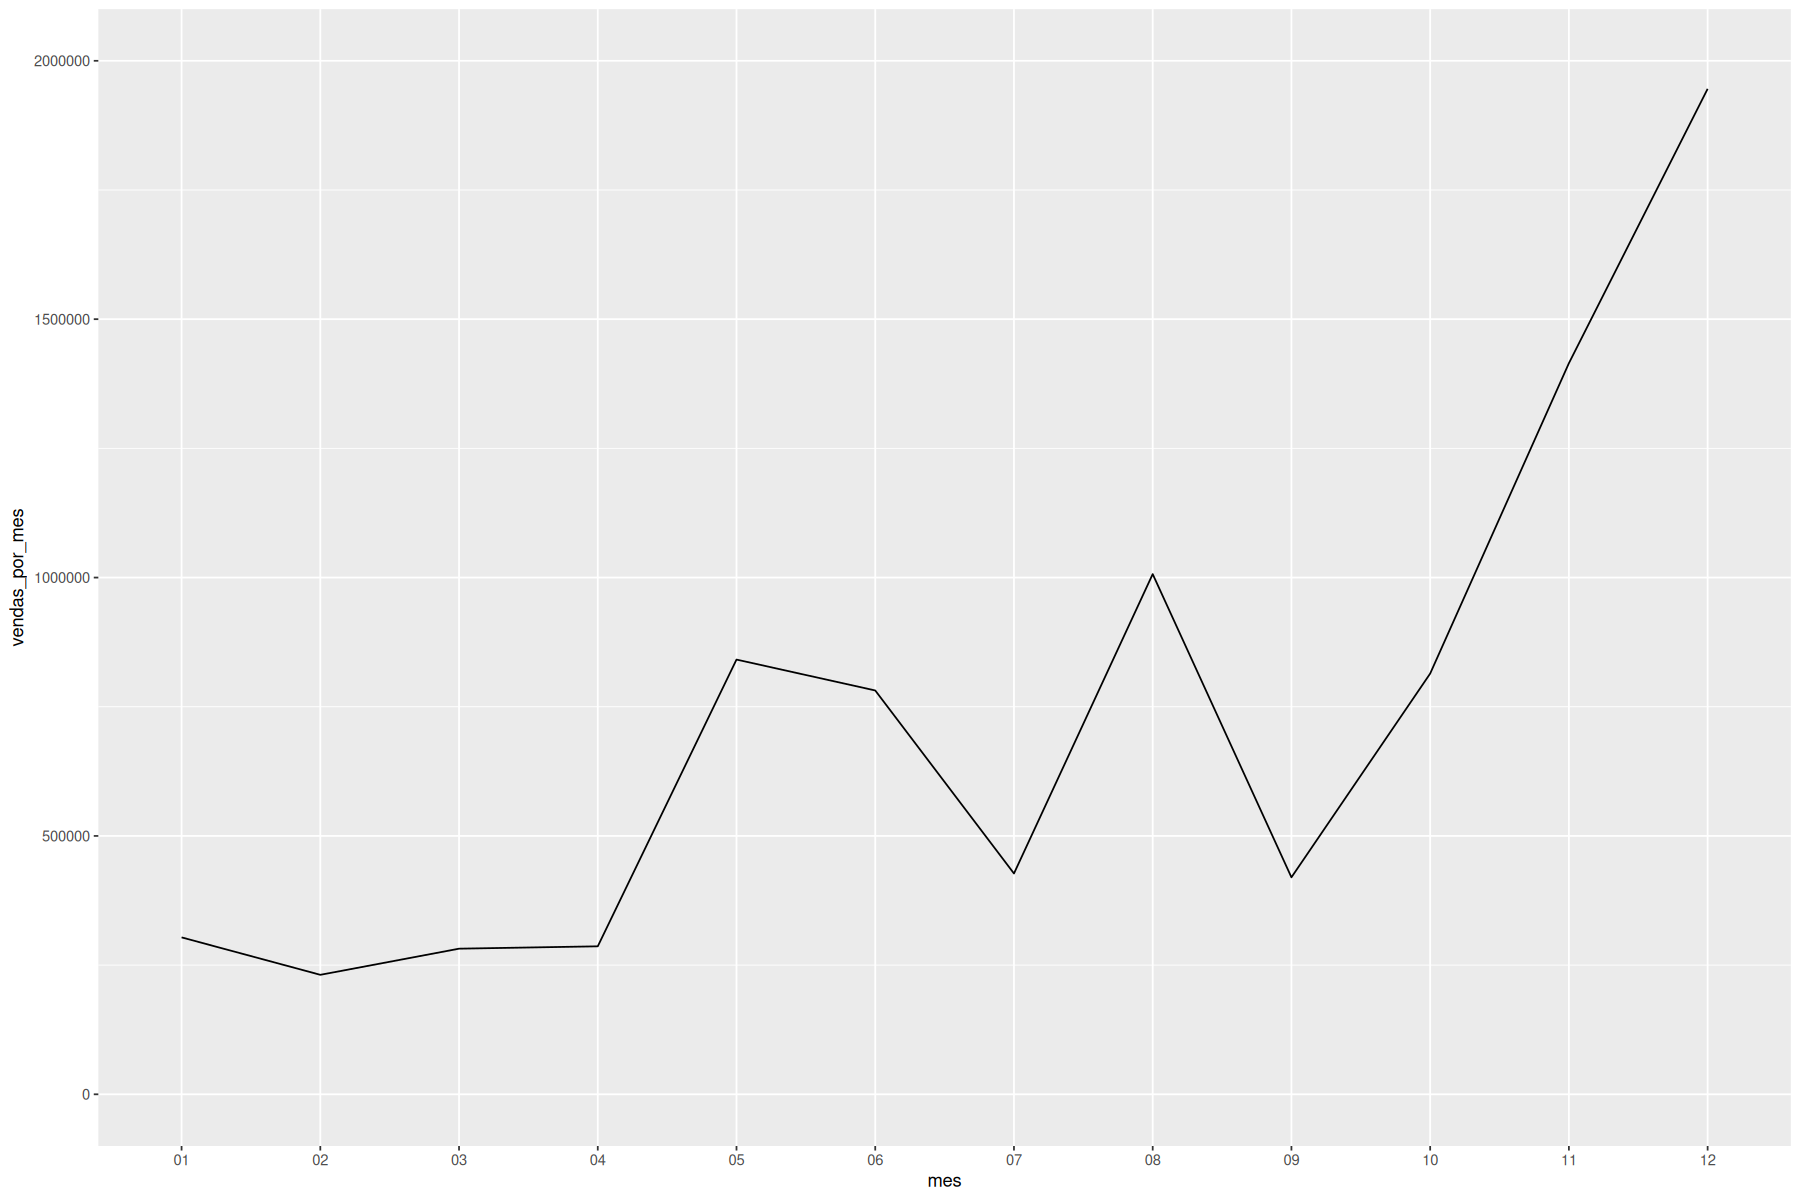

In [24]:
ggplot(vendas_por_mes, aes(x = mes, y = vendas_por_mes)) +
    geom_line(aes(group = 1)) + 
    ylim(0, 2e6)

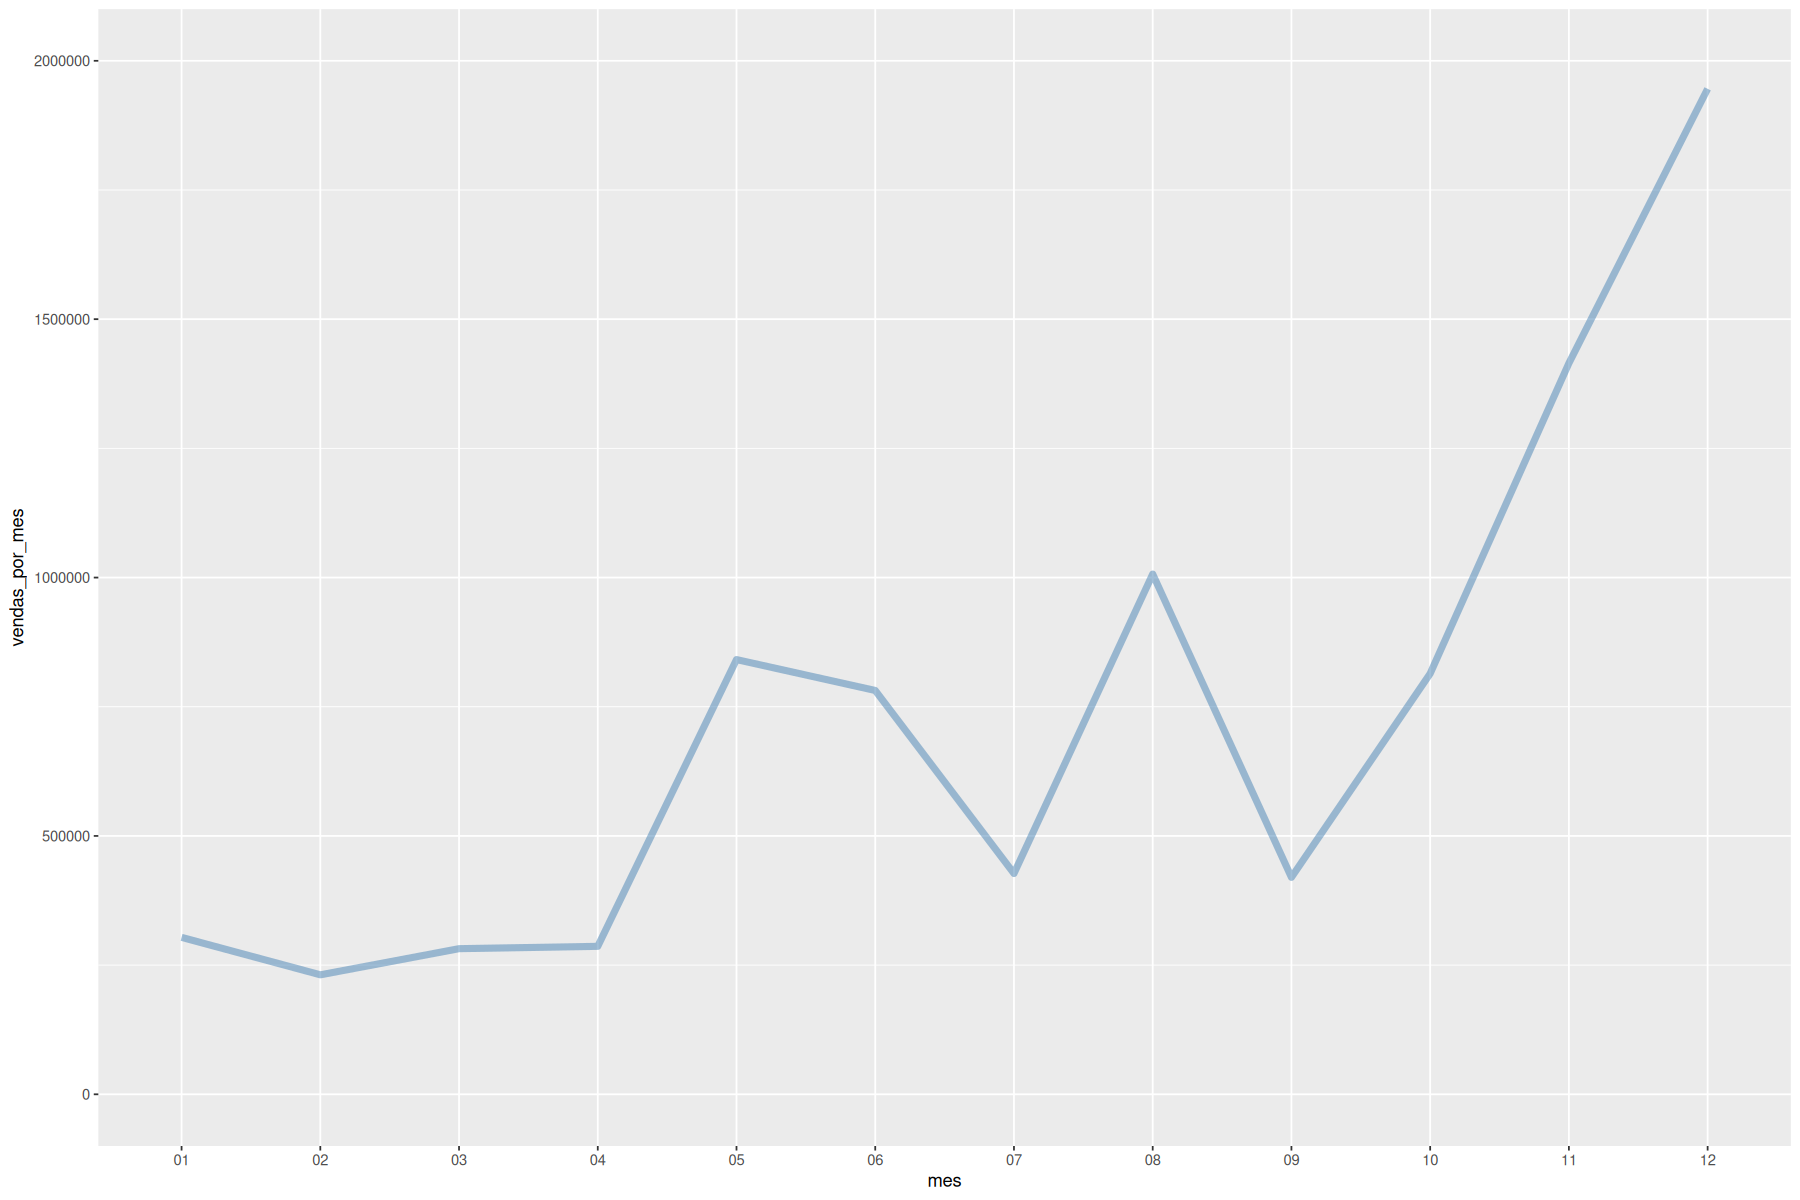

In [25]:
ggplot(vendas_por_mes, aes(x = mes, y = vendas_por_mes, group=1)) +
  geom_line(linewidth = 2, color = "steelblue", alpha = 0.5) +
  ylim(0,2e6)

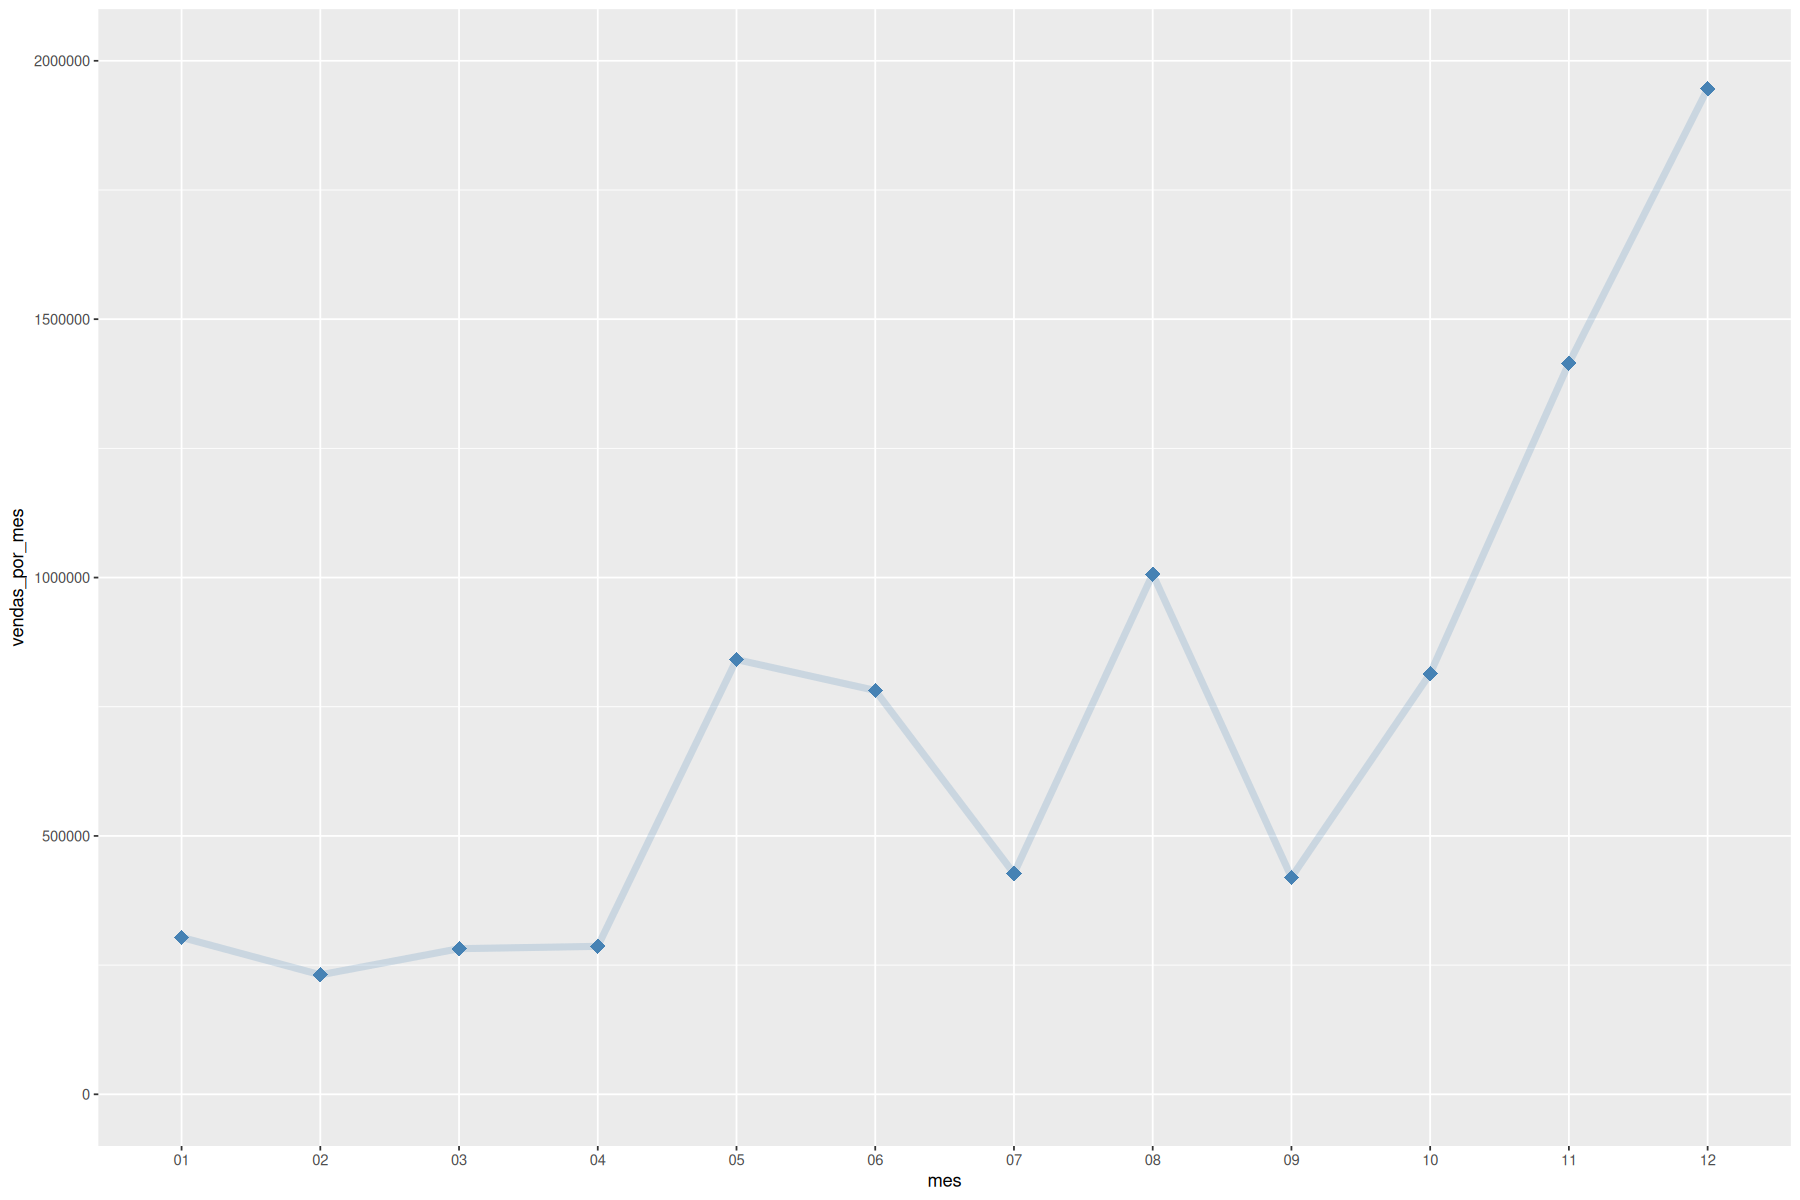

In [26]:
ggplot(vendas_por_mes, aes(x = mes, y = vendas_por_mes, group=1)) +
  geom_line(linewidth = 2, color = "steelblue", alpha = 0.2) +
  geom_point(size = 4, color = "steelblue", shape = "diamond") +
  ylim(0,2e6)

### Como está dividida a venda por trimestre por método de pagamento? O método PIX tem tido boa adesão?

In [27]:
vendas <- vendas %>%
        mutate(trimestre = as.factor(quarter(data)))

In [28]:
vendas_por_tri <- vendas %>% 
    group_by(trimestre, metodo_pagamento) %>%
    summarise(valor_tri = sum(valor_total))

`summarise()` has grouped output by 'trimestre'. You can override using the
`.groups` argument.


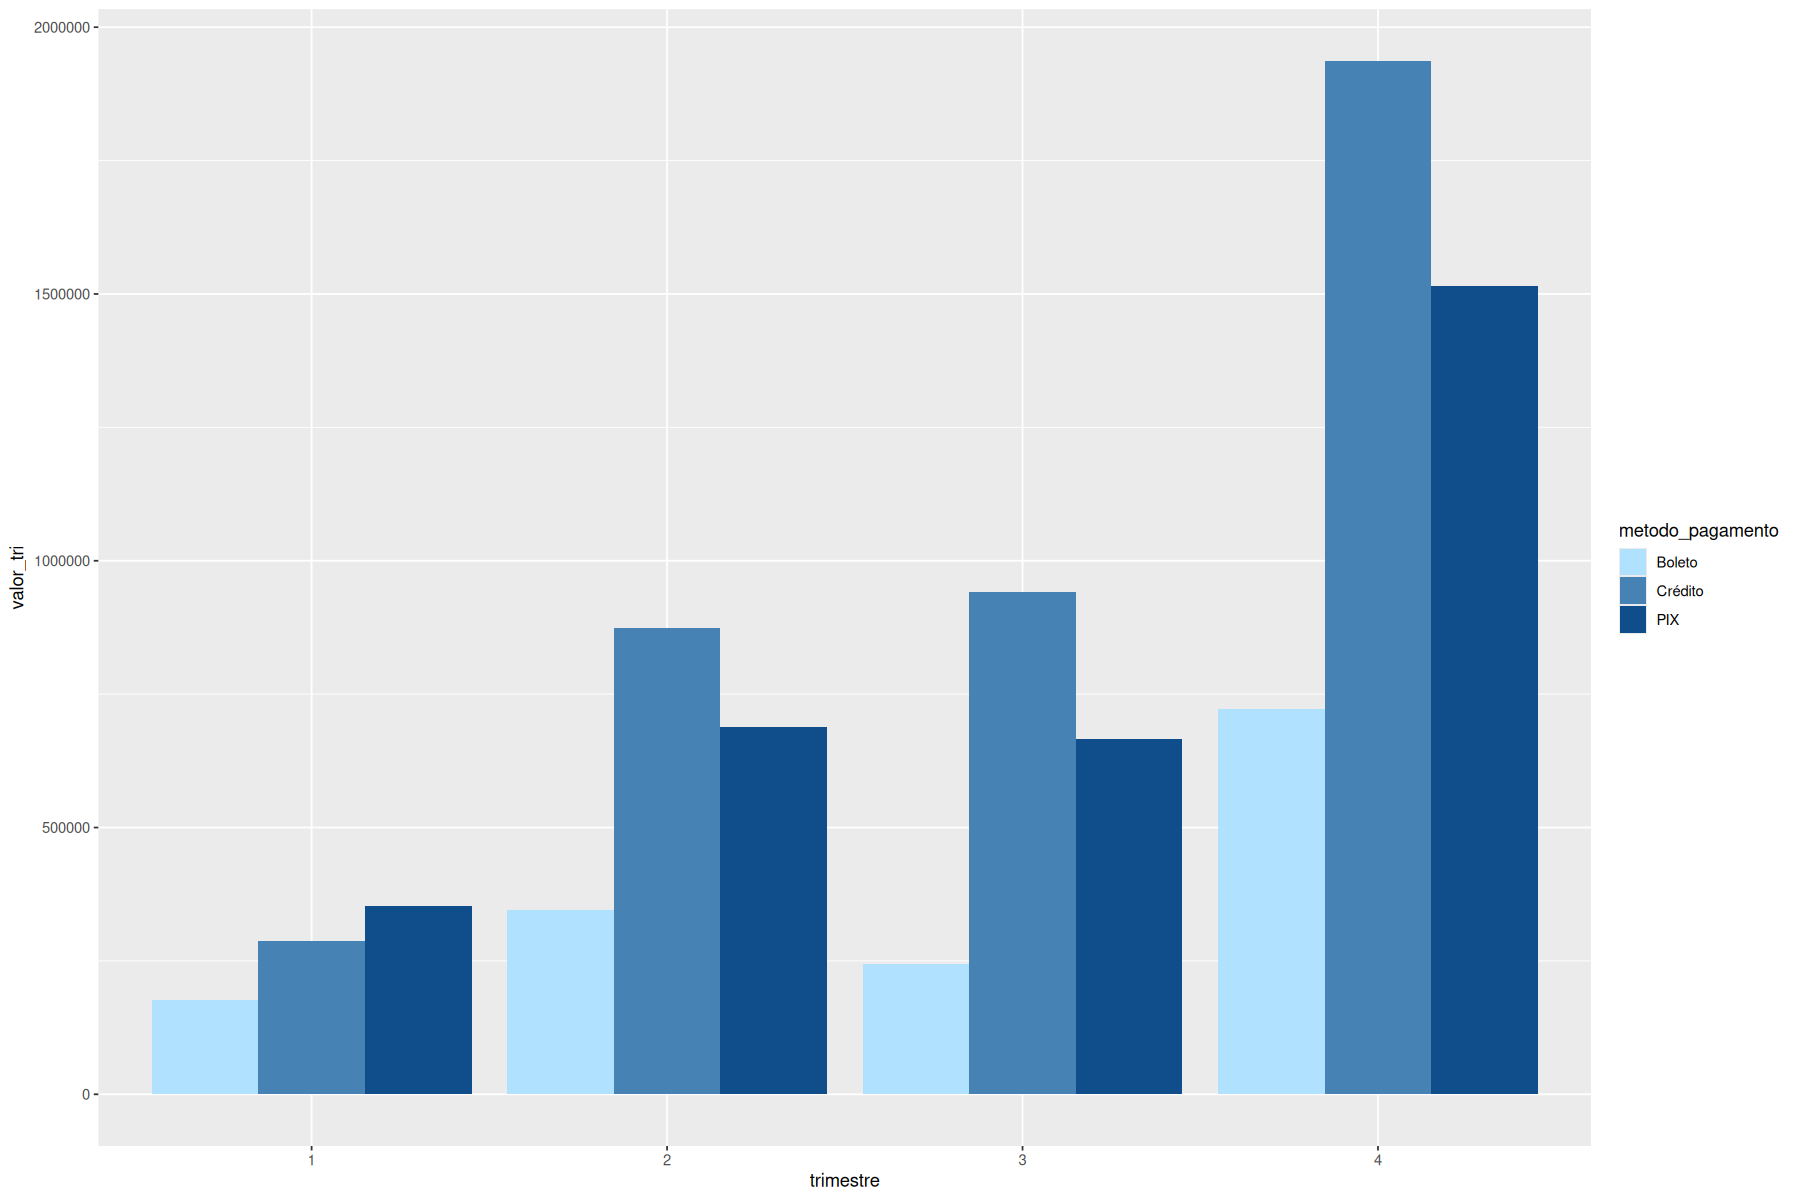

In [29]:
cores <- c("lightskyblue1","steelblue","dodgerblue4")

ggplot(vendas_por_tri, aes(trimestre, valor_tri, fill = metodo_pagamento)) +
  geom_col(position = "dodge") +
  scale_fill_manual(values = cores)

# personalisando graficos

In [30]:
nomes <- c("red_1", "red_2", "red_3", "grey_1", "grey_2",
           "grey_3", "blue_1", "blue_2", "blue_3")
cores <- c("#ee8399", "#e23155", "#881d33", "#f3f3f3", "#ebebeb", 
           "#8d8d8d", "#a3adbd", "#5e708c", "#19325b")

for (i in seq(nomes)) assign(nomes[i],cores[i])

In [31]:
grafico_vendas_mes <- 
    ggplot(vendas_por_mes, aes(x = mes, y = vendas_por_mes, group=1)) + 
        geom_line(linewidth = 2, color = blue_2, alpha = 0.2) + 
        geom_point(size = 4, color = blue_2, shape = "diamond") + 
        ylim(0,2e6)

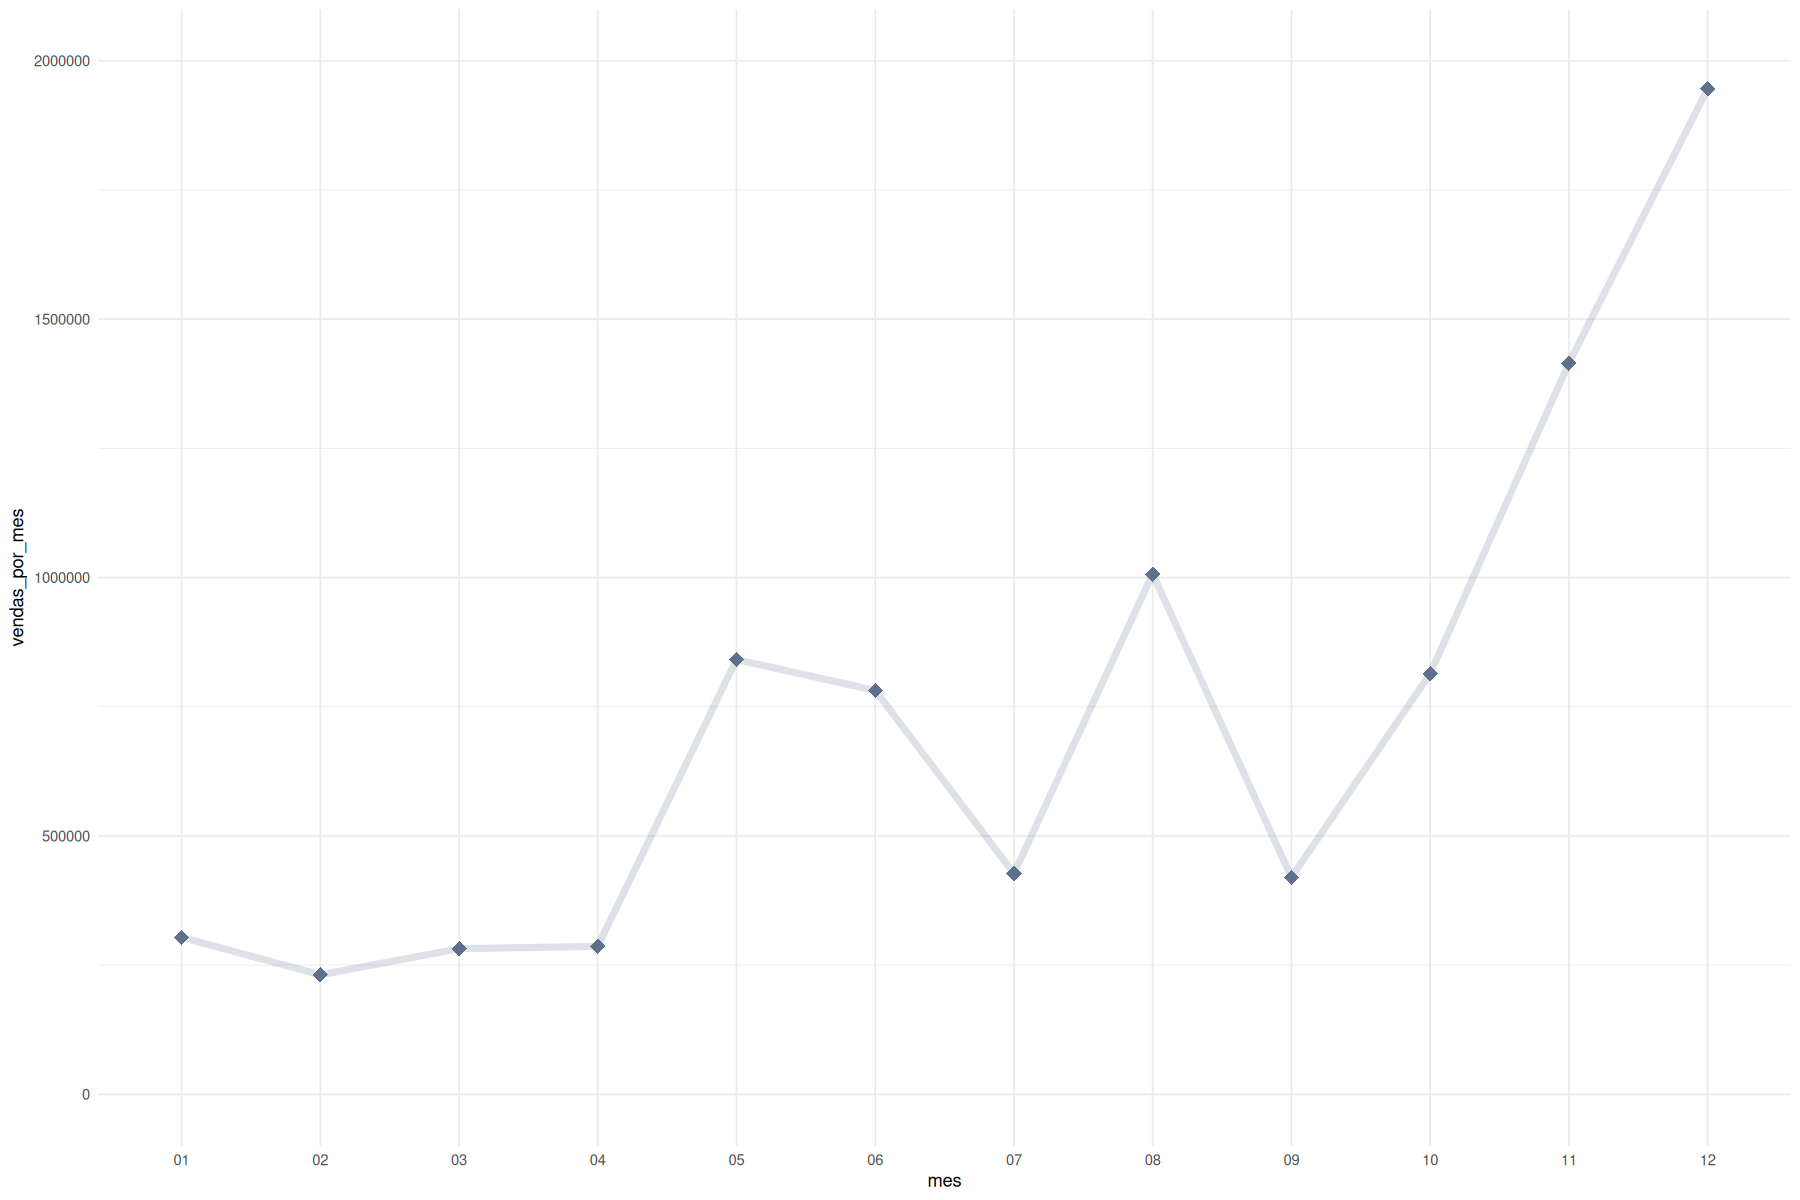

In [32]:
grafico_vendas_mes + 
    theme_minimal()

In [33]:
tema <- theme_minimal() +
  theme(panel.grid.major.x = element_blank(),
        plot.title = element_text(size=14, face="bold", vjust = +2),
        axis.text = element_text(size = 10),
        axis.title.x = element_text(size = 12, face = "bold", vjust = -1),
        axis.title.y = element_text(size = 12, face = "bold", vjust = +3),
        legend.position = "bottom"
        )

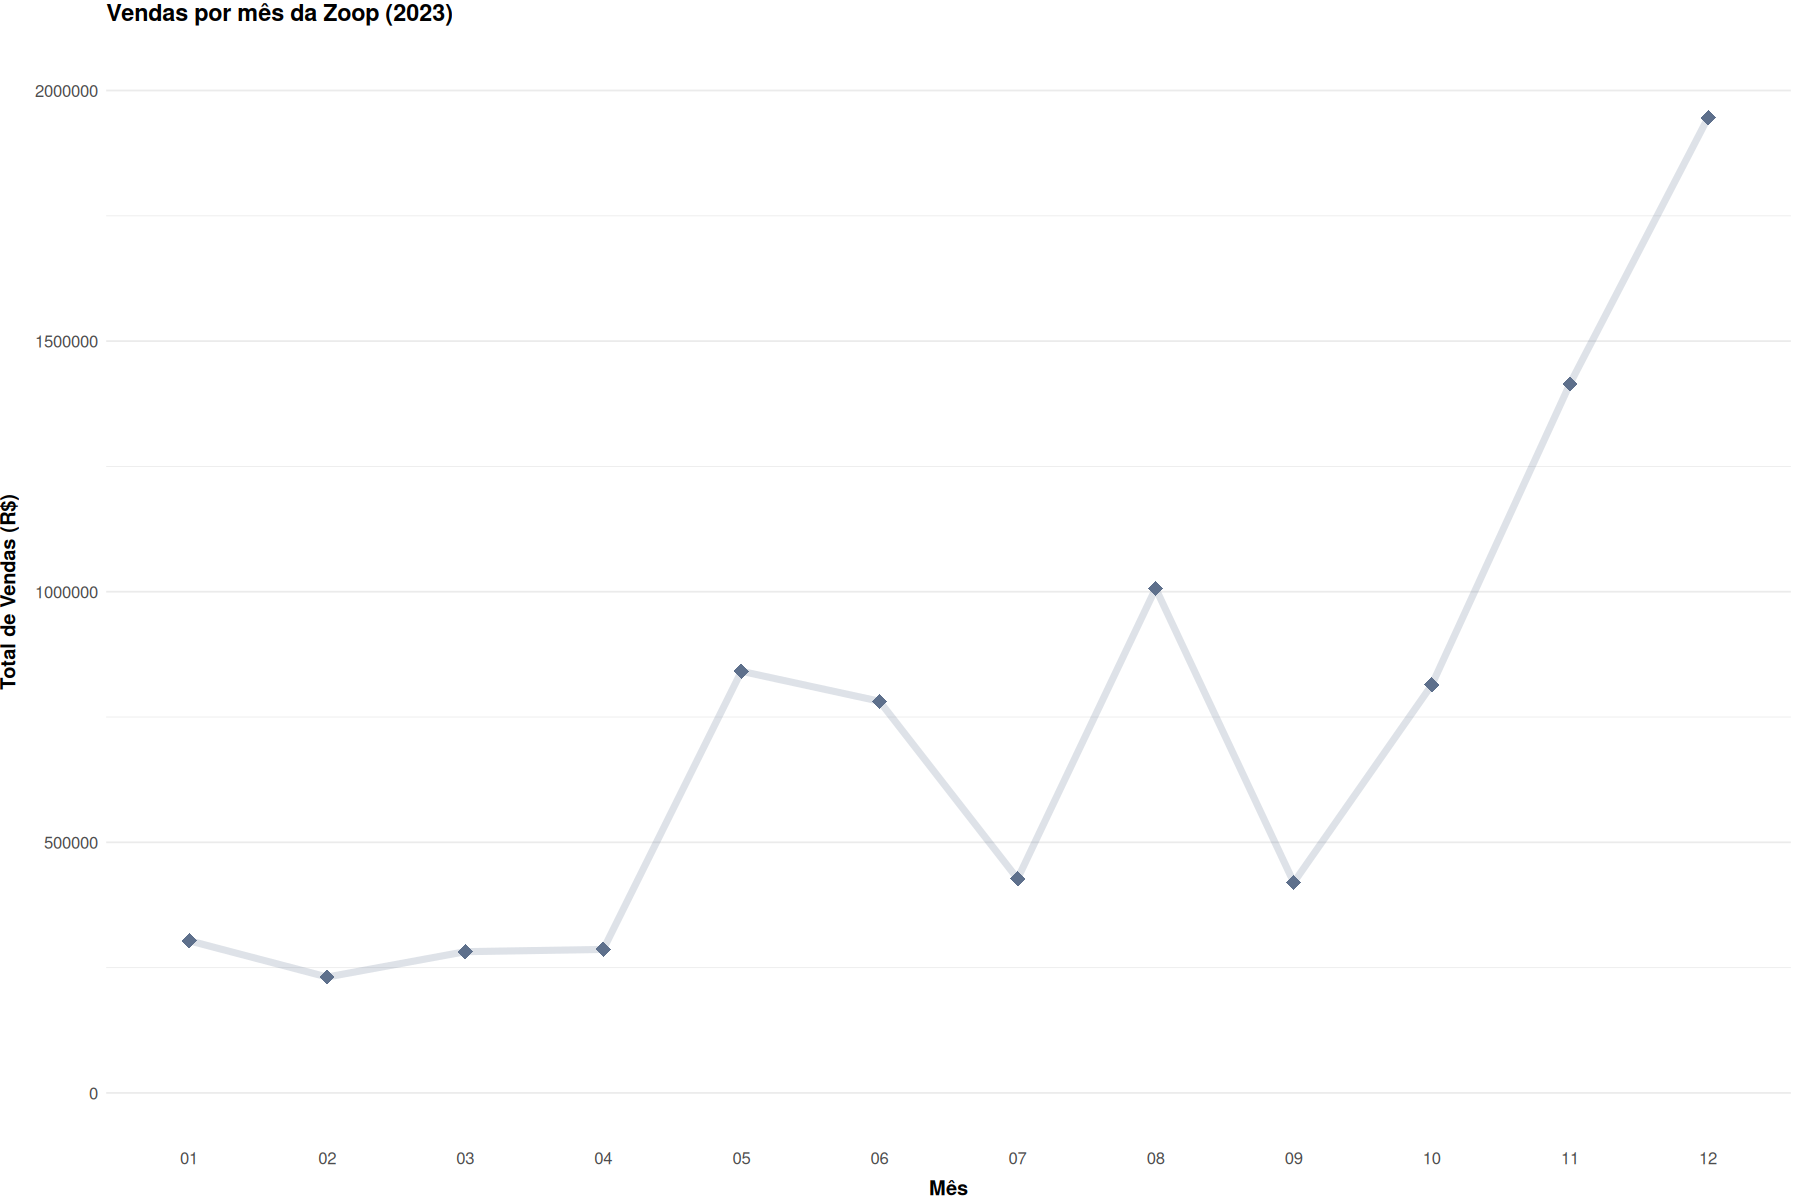

In [34]:
grafico_vendas_mes <- grafico_vendas_mes + 
  tema +
  labs(title = "Vendas por mês da Zoop (2023)",
       x = "Mês",
       y = "Total de Vendas (R$)")

grafico_vendas_mes


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


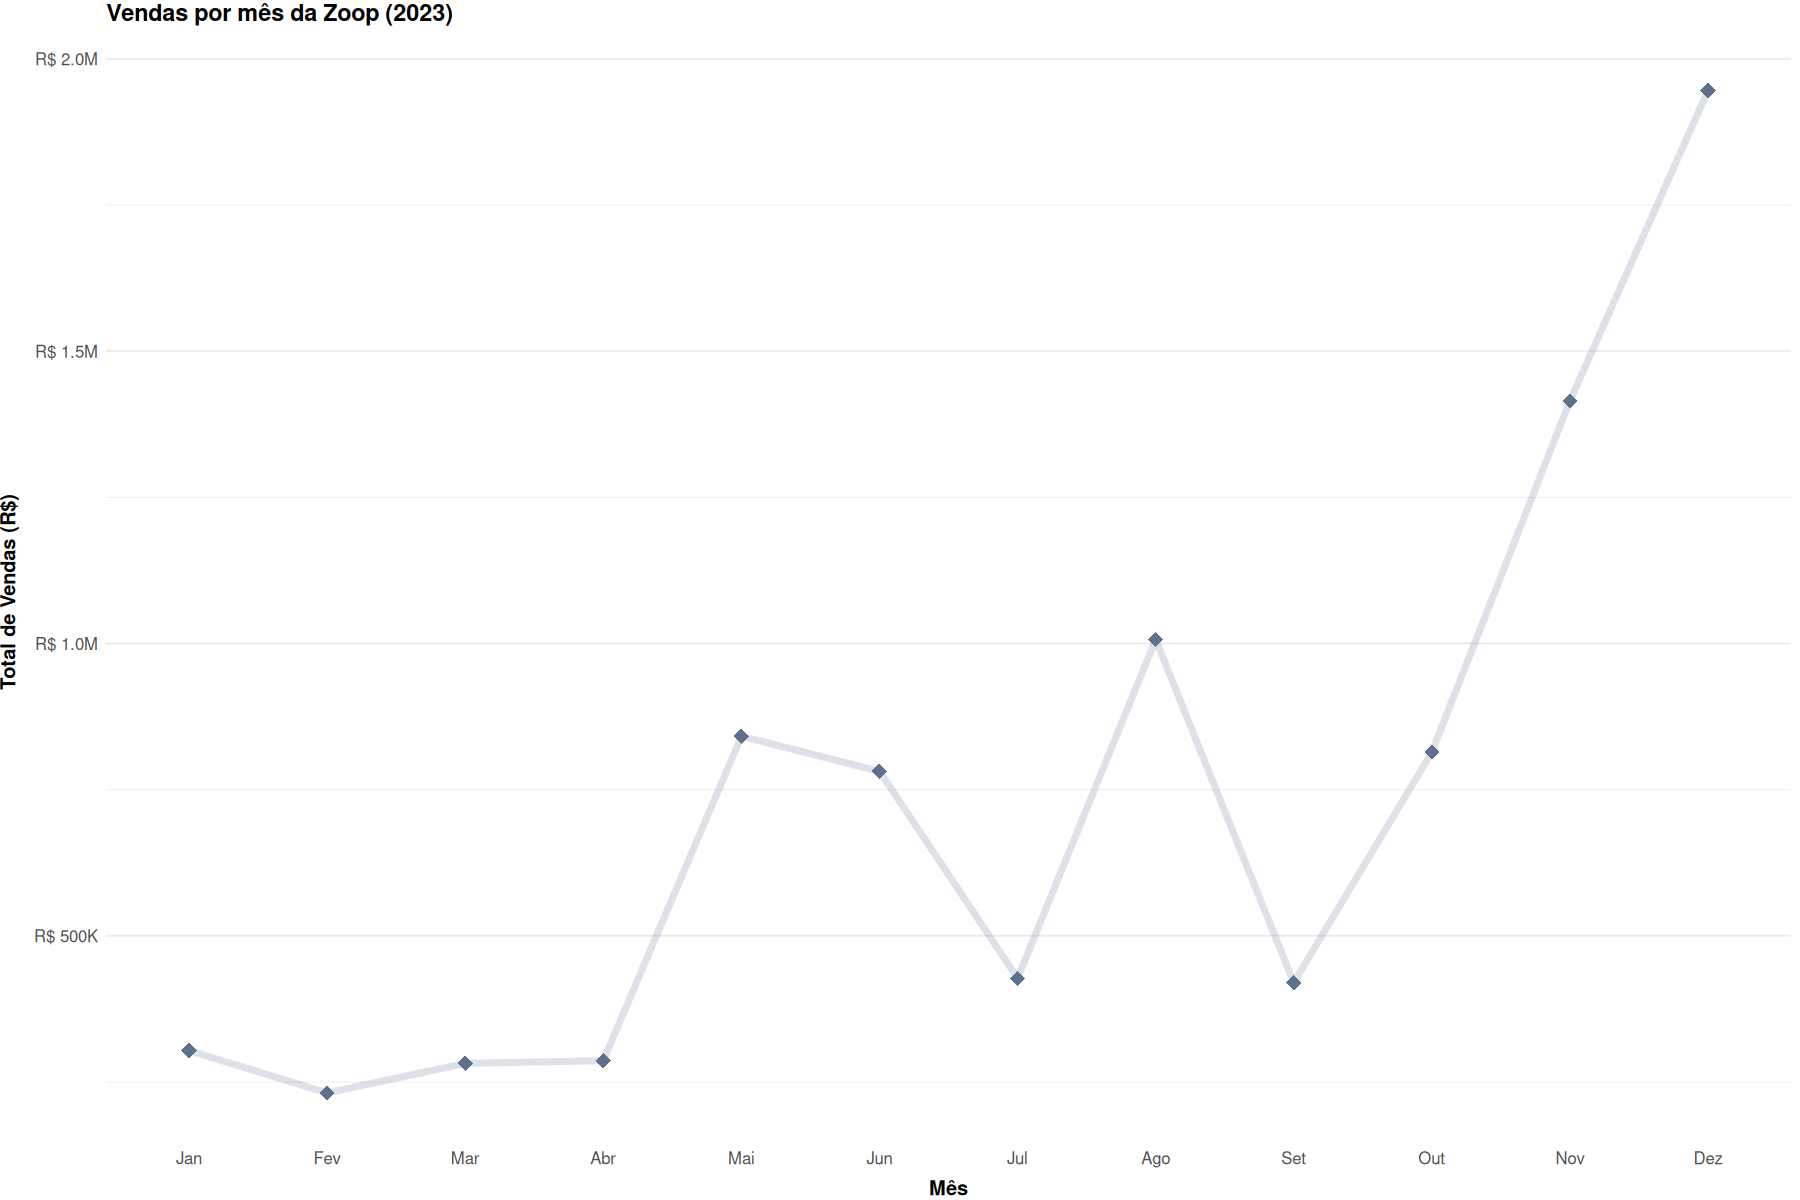

In [35]:
meses <- c("Jan", "Fev", "Mar", "Abr", "Mai", "Jun", 
           "Jul", "Ago", "Set", "Out", "Nov", "Dez")

grafico_vendas_mes <- grafico_vendas_mes +
  scale_x_discrete(labels = meses) +
  scale_y_continuous(labels = label_number(prefix = "R$ ",
                                            scale_cut = cut_short_scale()))
grafico_vendas_mes

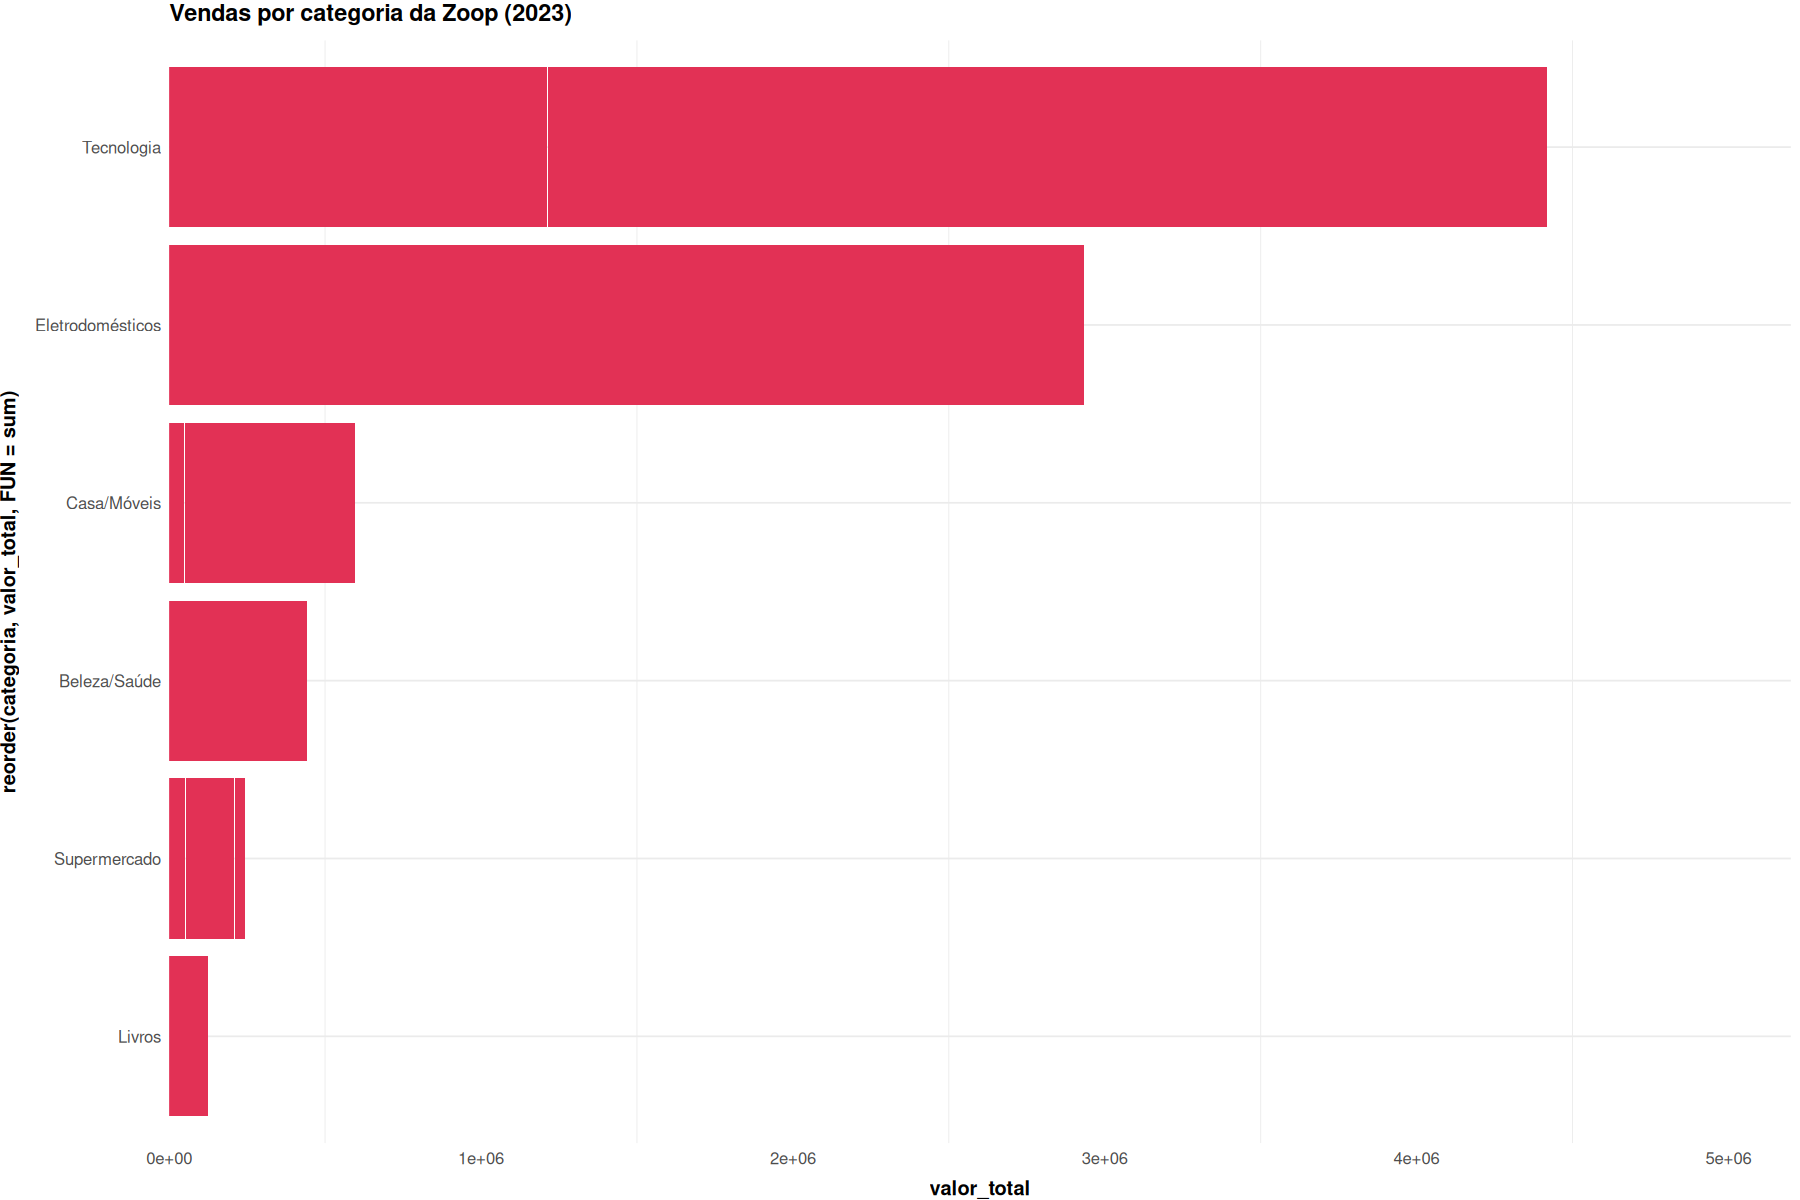

In [36]:
grafico_vendas_categoria <- 
  ggplot(vendas, aes(x = reorder(categoria, valor_total, FUN = sum), y = valor_total)) + 
    geom_col(fill = red_2) +
    scale_y_continuous(expand = c(0,0), limits = c(0, 5.2e6)) +
    coord_flip() +
    tema +
    labs(title = "Vendas por categoria da Zoop (2023)")

grafico_vendas_categoria

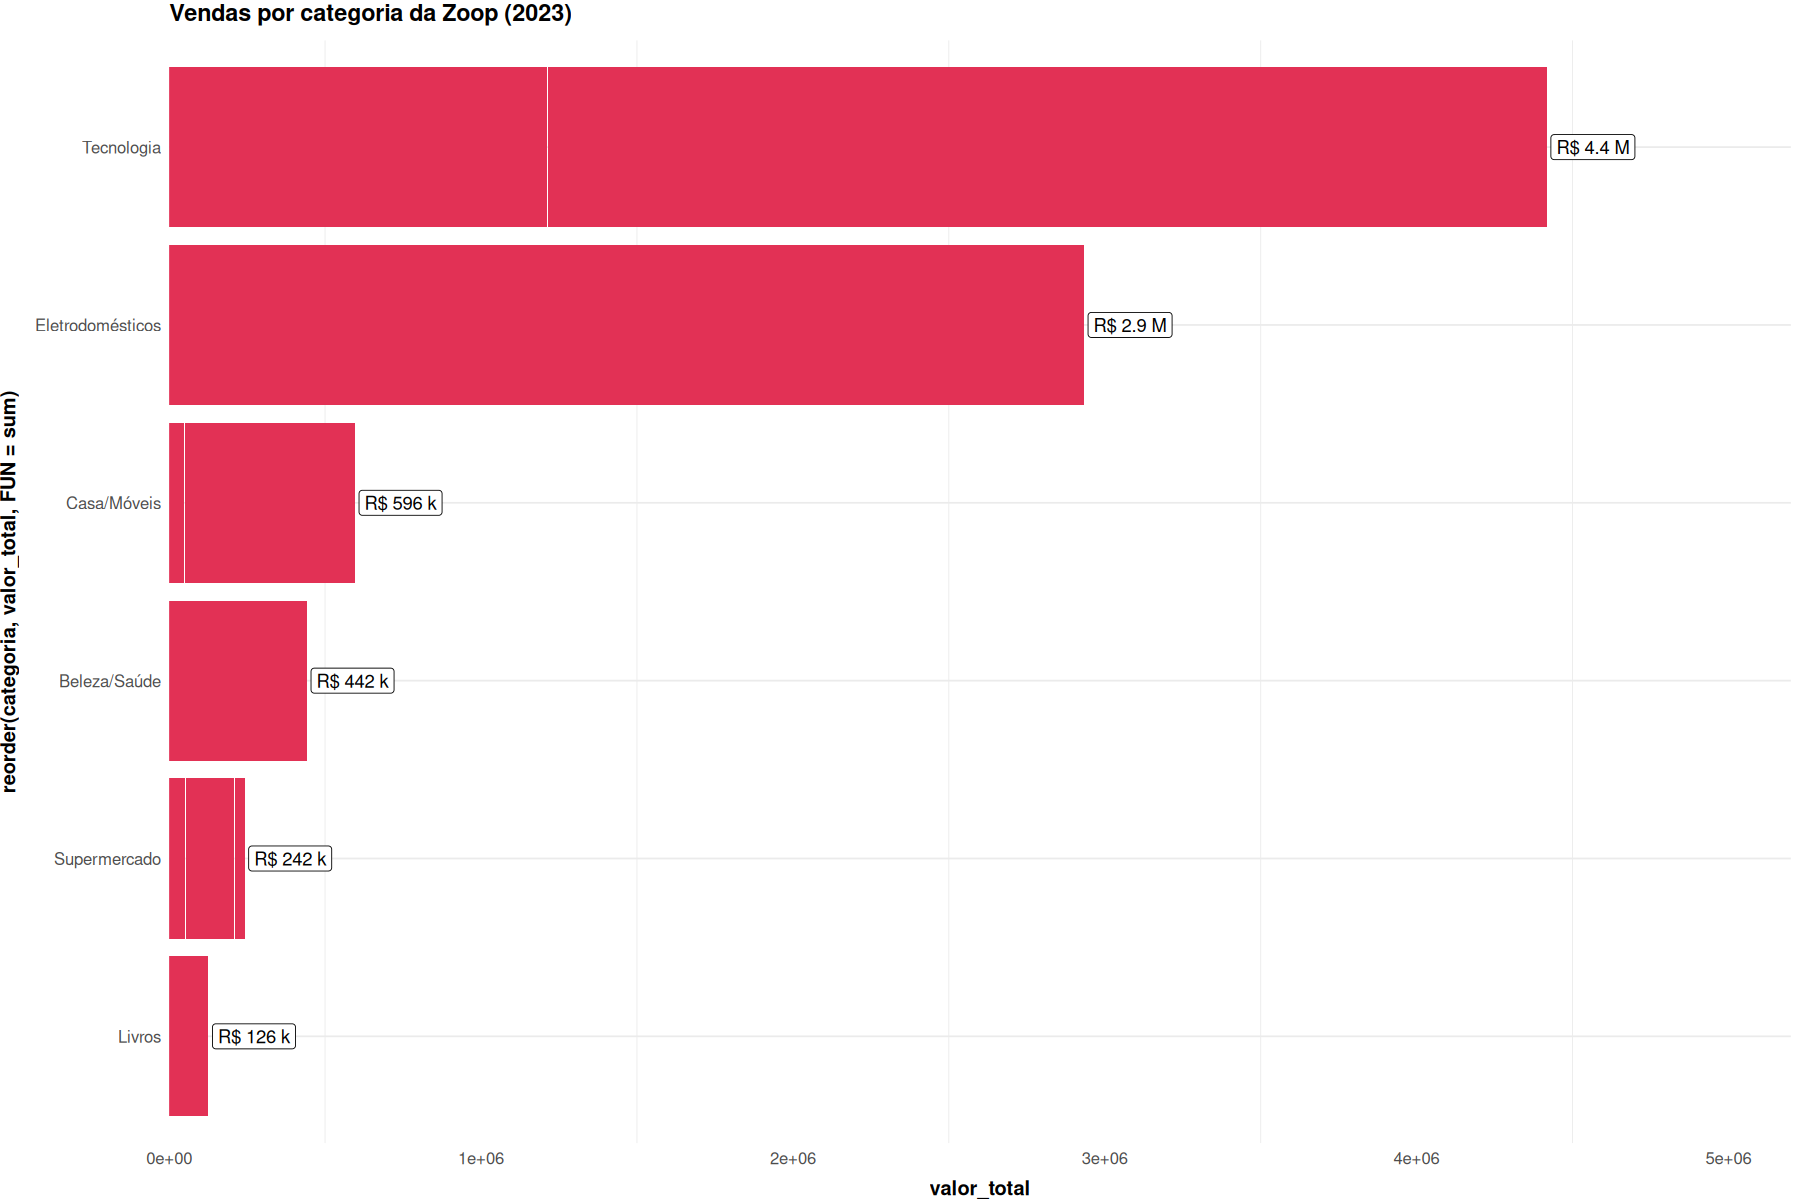

In [37]:
grafico_vendas_categoria <- grafico_vendas_categoria +
  geom_label(aes(label = number(after_stat(y),
                                prefix = "R$ ",
                                scale_cut = cut_si(""))),  
            stat = 'summary', fun = "sum", hjust=-0.05)

grafico_vendas_categoria


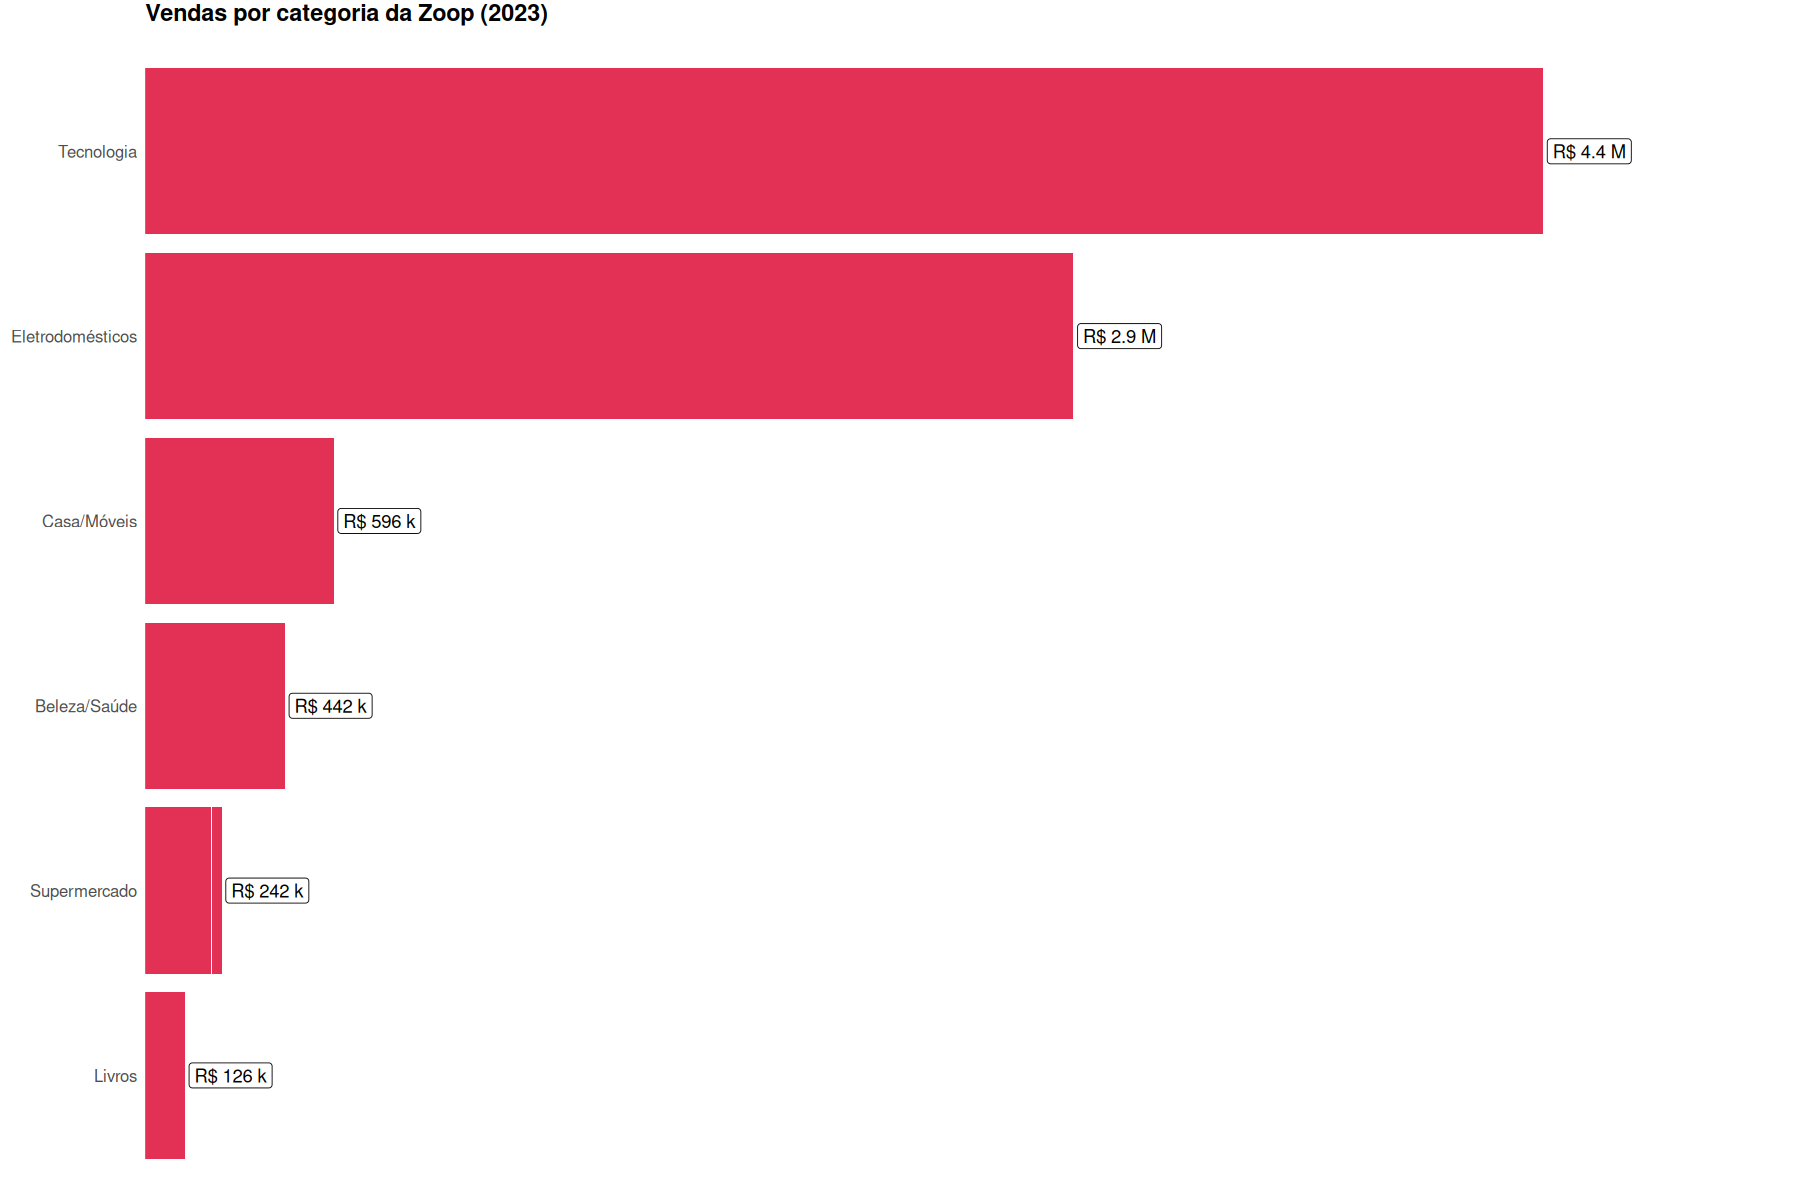

In [38]:
grafico_vendas_categoria <- 
  grafico_vendas_categoria + 
    theme(panel.grid = element_blank(),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.x = element_blank())

grafico_vendas_categoria


In [39]:
cores <- c(blue_1, blue_2, blue_3)

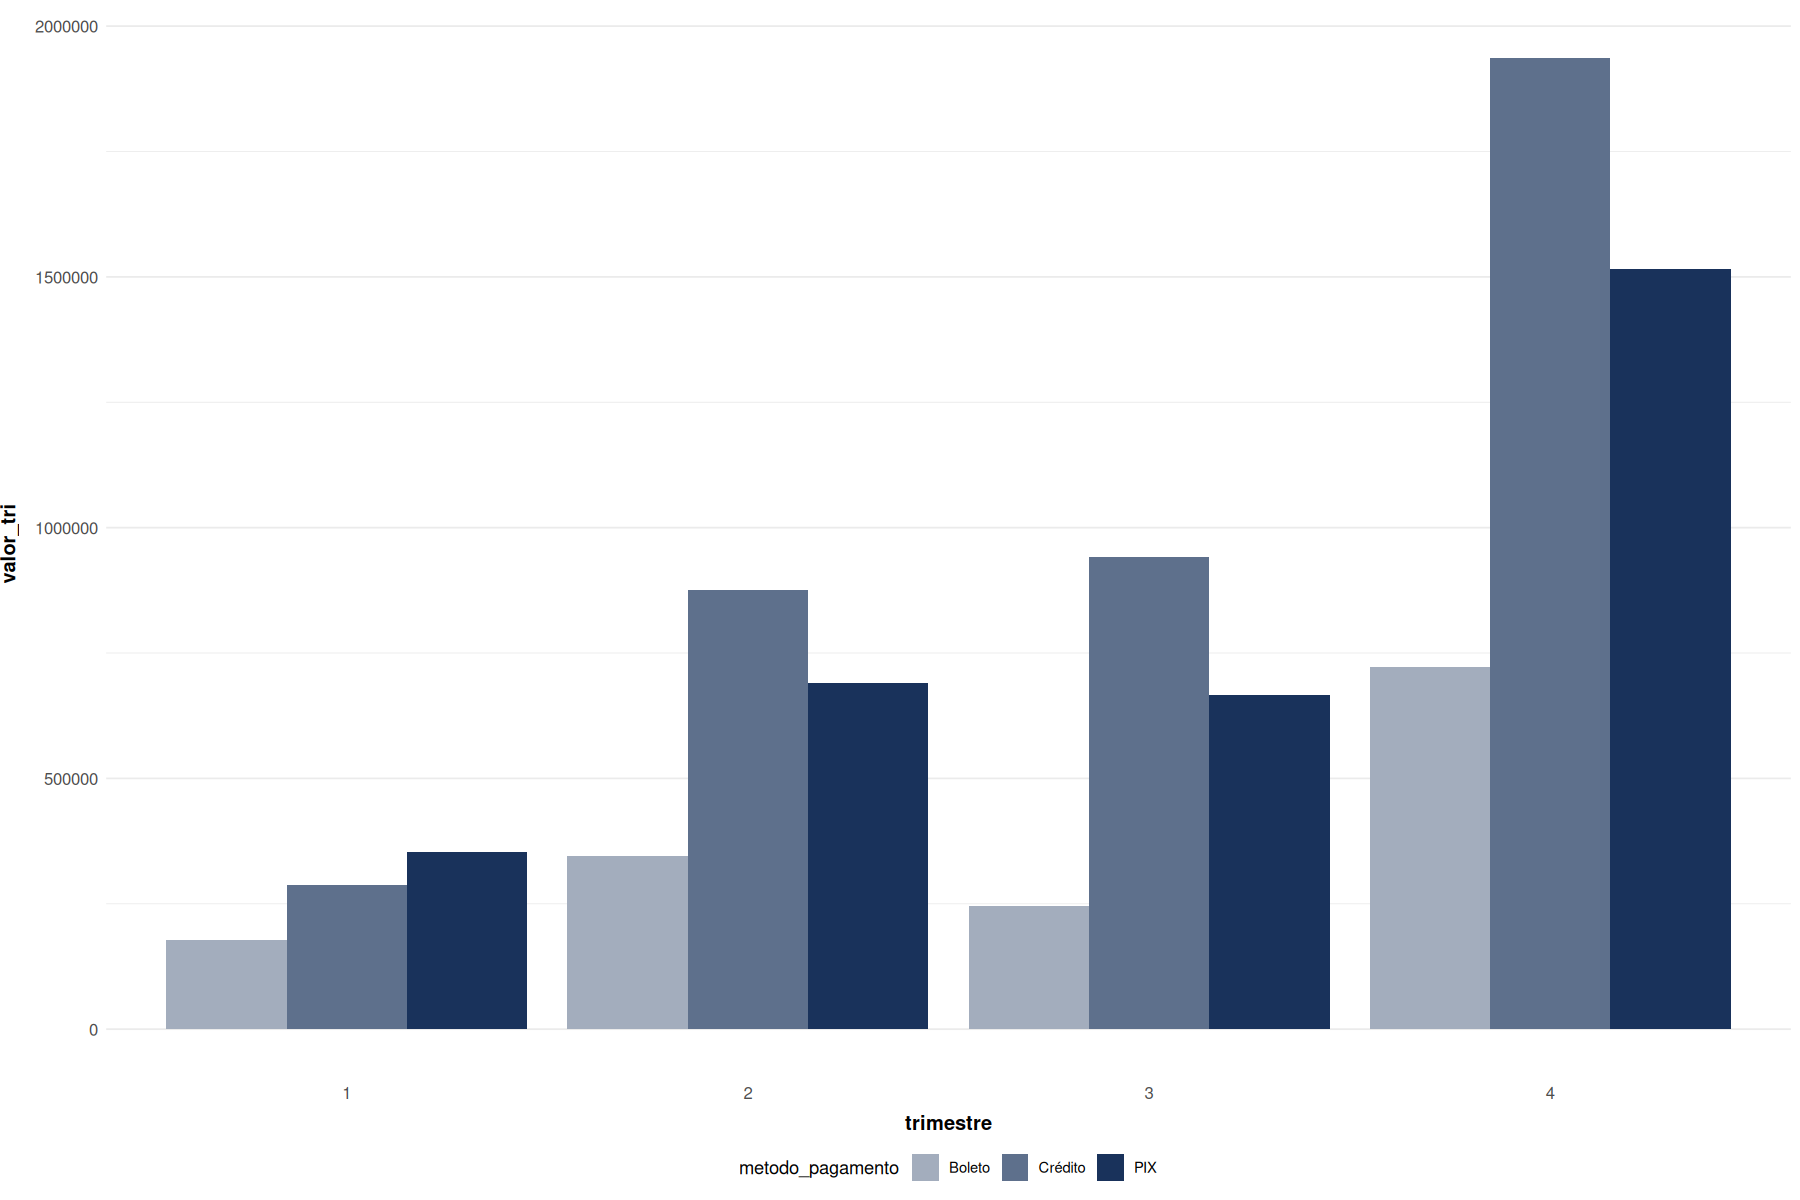

In [41]:
grafico_vendas_pag <-
  ggplot(vendas_por_tri, aes(trimestre, valor_tri, fill = metodo_pagamento)) +
  geom_col(position = "dodge") +
  scale_fill_manual(values = cores) +
  tema

grafico_vendas_pag


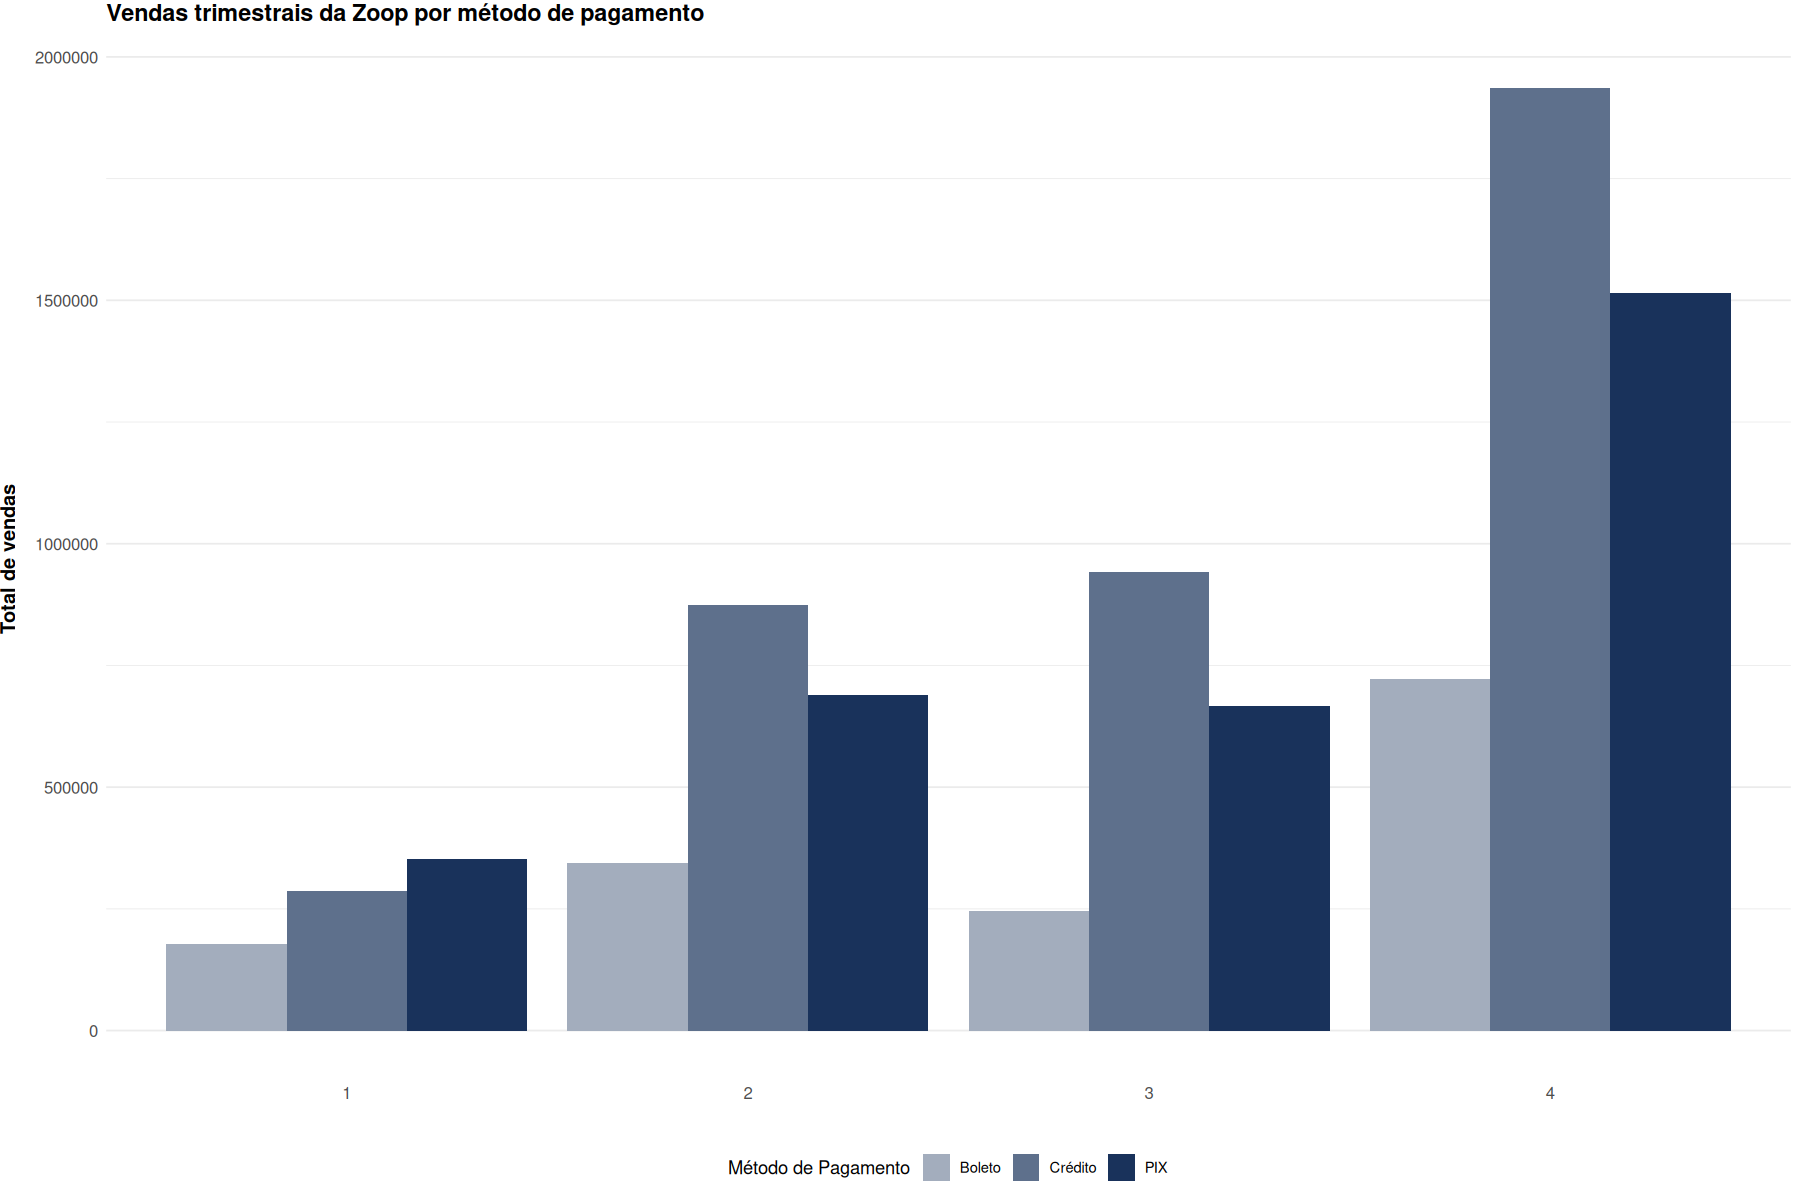

In [42]:
grafico_vendas_pag <- grafico_vendas_pag +
  labs(title = "Vendas trimestrais da Zoop por método de pagamento",
       x = "", y = "Total de vendas", fill = "Método de Pagamento")

grafico_vendas_pag


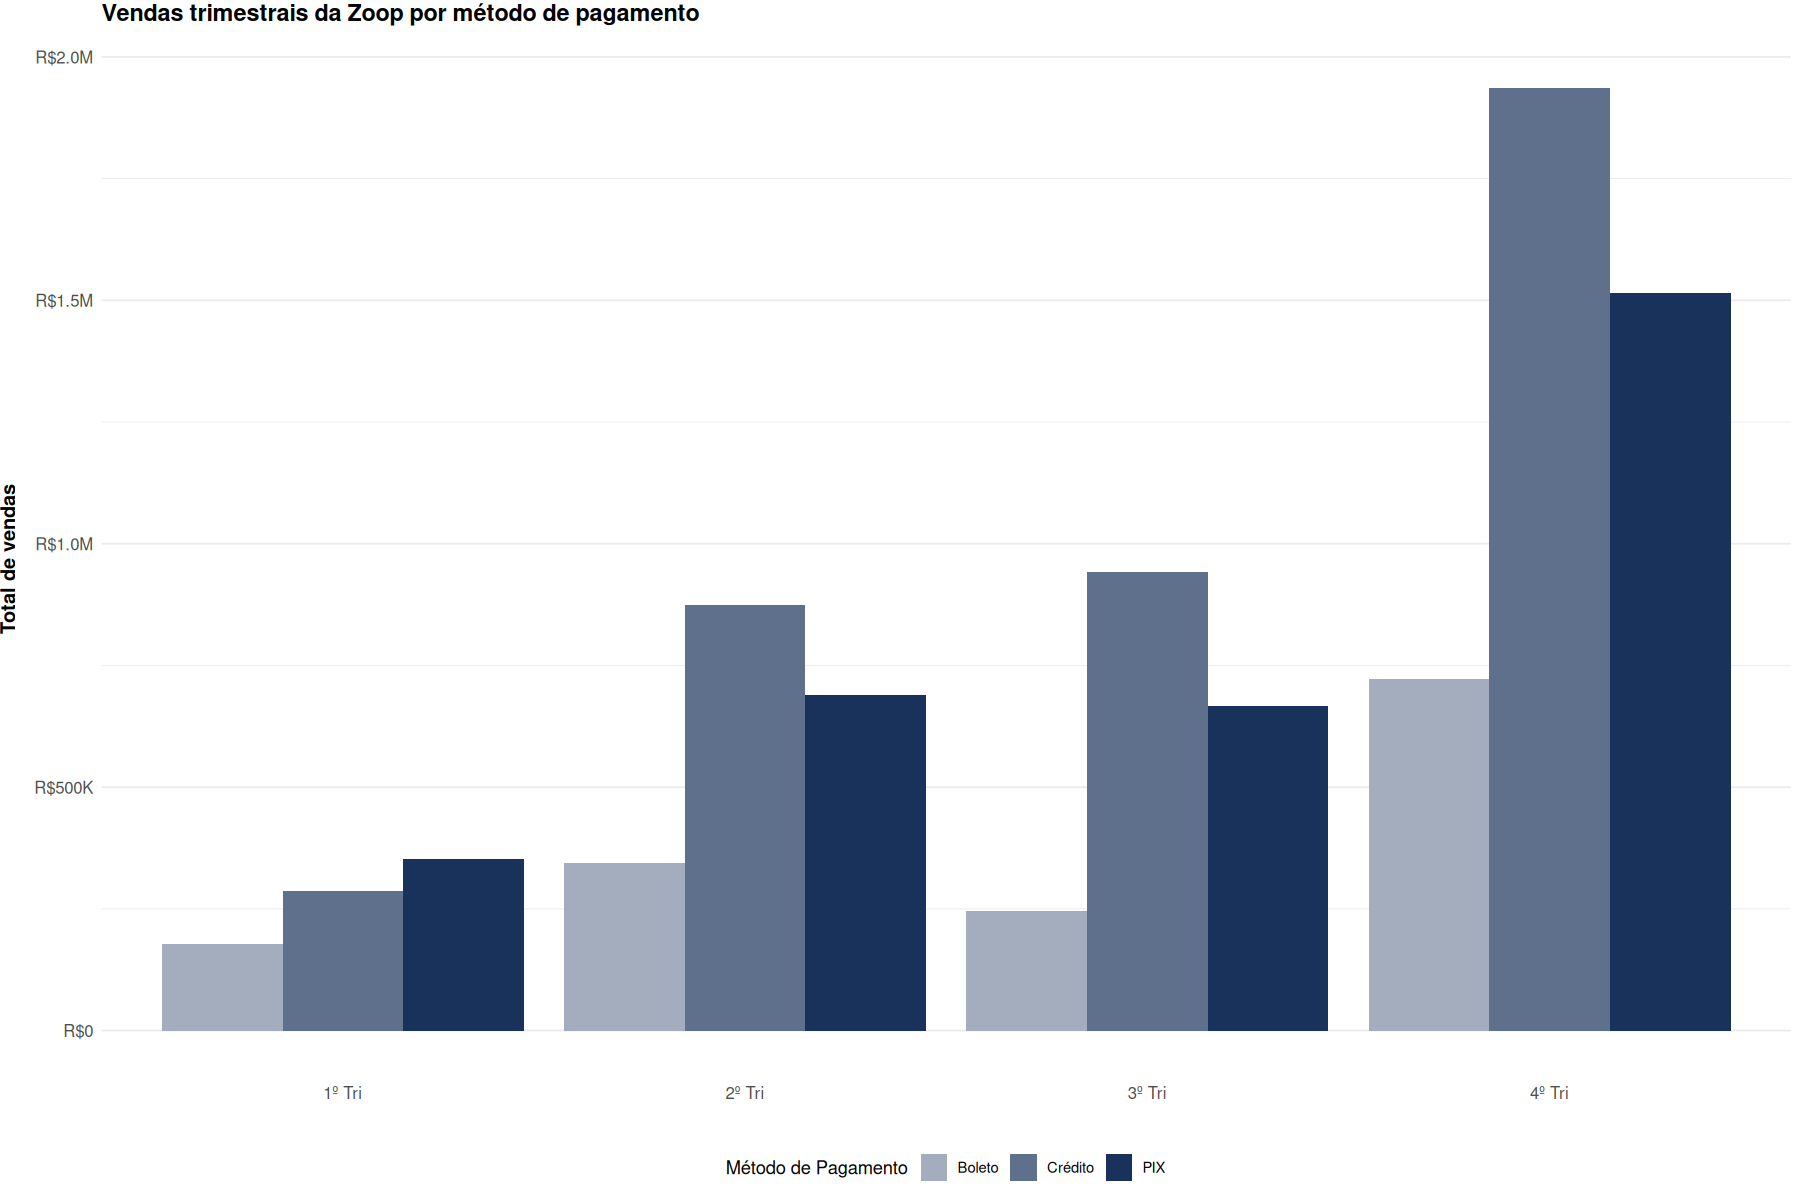

In [43]:
grafico_vendas_pag <- grafico_vendas_pag +
  scale_x_discrete(labels = c("1º Tri", "2º Tri", "3º Tri", "4º Tri")) +
  scale_y_continuous(labels = label_number(prefix = "R$",
                                            scale_cut = cut_short_scale()))

grafico_vendas_pag

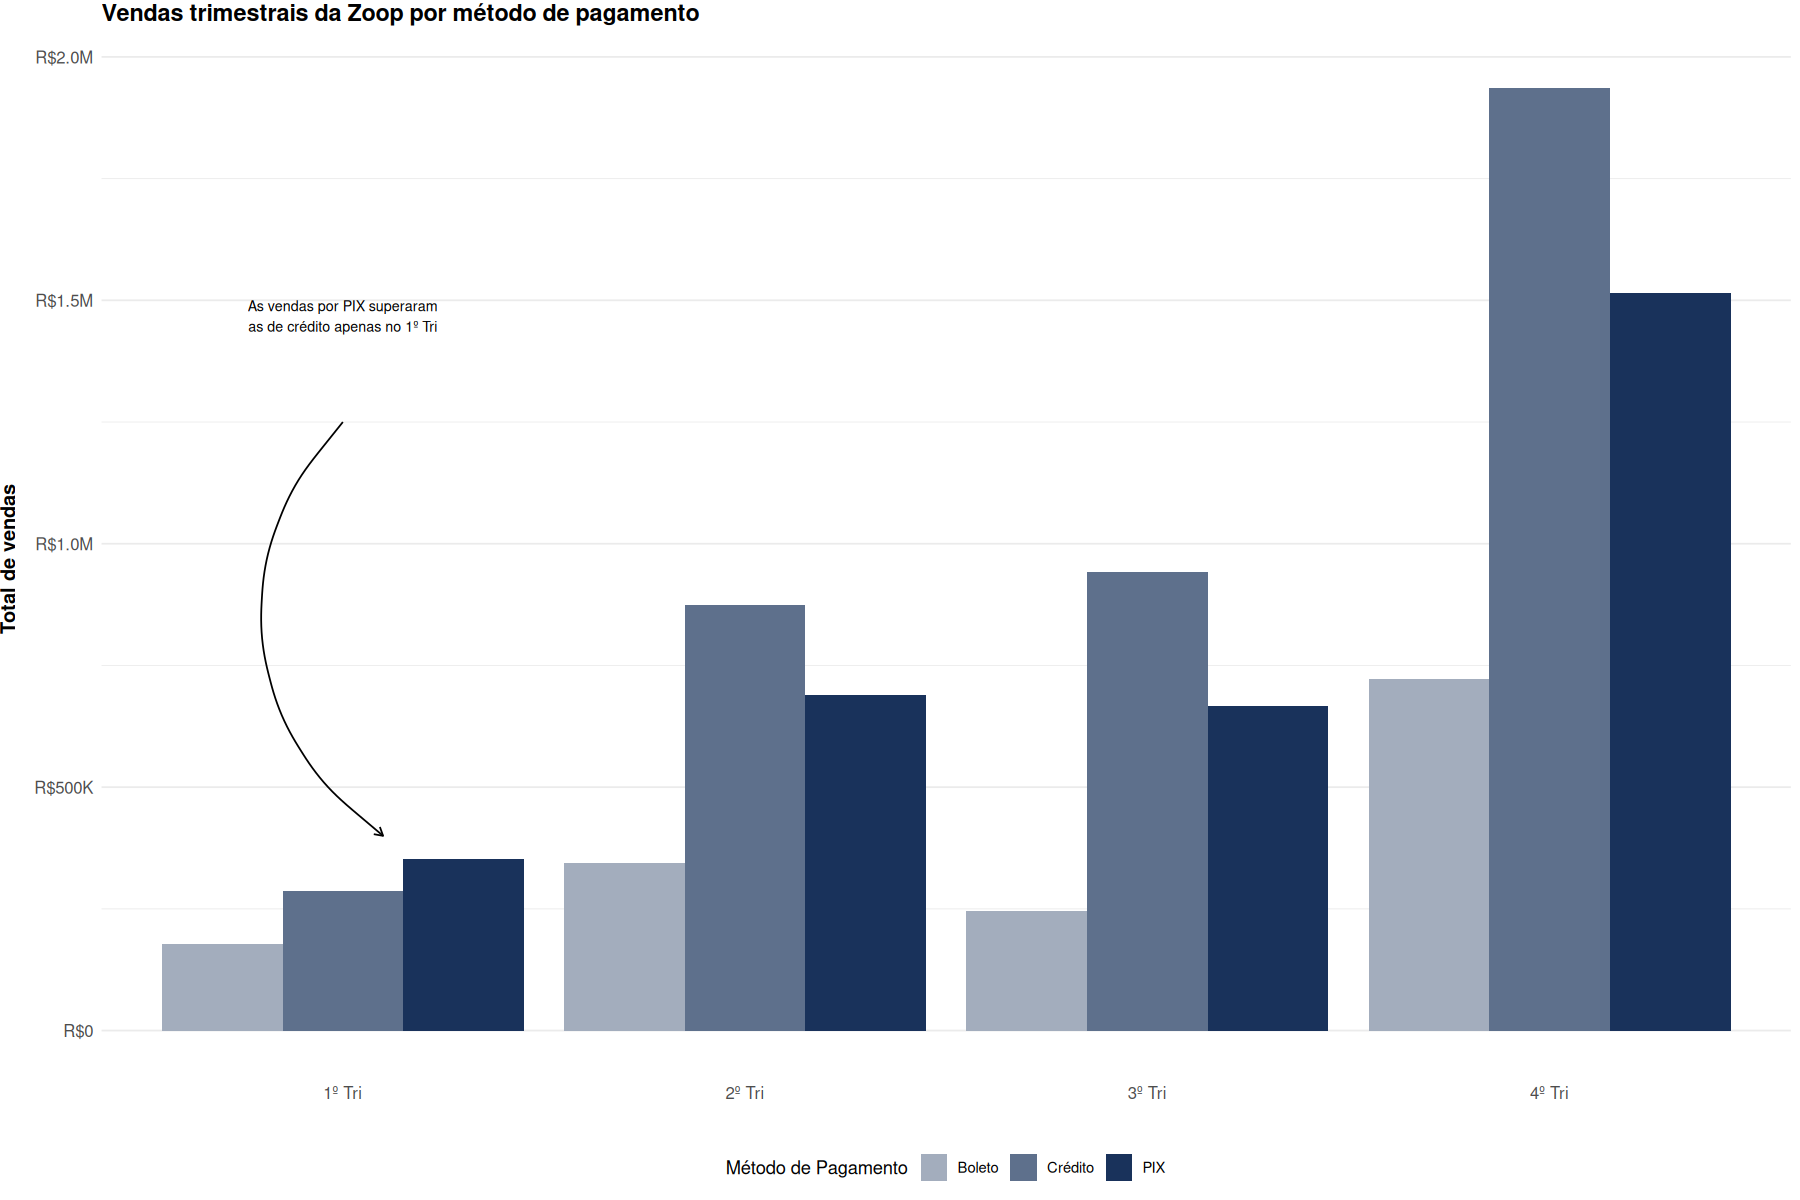

In [44]:
grafico_vendas_pag <- grafico_vendas_pag +
  annotate("text",
            x = 1 ,
            y = 1.5e6 ,
            label = "As vendas por PIX superaram\nas de crédito apenas no 1º Tri",
            vjust = 1, size = 3) +
  annotate("curve",
            x = 1,
            y = 1.25e6,
            xend = 1.1,
            yend = 400e3,
            arrow = arrow(length = unit(2, "mm")))
 
grafico_vendas_pag

# salvando graficos

In [46]:

ggsave("imagens/grafico_vendas_mes.png", grafico_vendas_mes,
       height = 5, width = 7, dpi=300)
ggsave("imagens/grafico_vendas_categoria.png", grafico_vendas_categoria,
       height = 5, width = 7, dpi=300)
ggsave("imagens/grafico_vendas_pag.png", grafico_vendas_pag,
       height = 5, width = 7, dpi=300)